# <font color =dimgrey>Bike Sharing Case Study
**<font color =slateblue>BoomBikes Demand Analysis and Revenue Optimization**


A US bike-sharing provider, **BoomBikes**, has recently faced significant drops in their revenues due to the ongoing **COVID-19 pandemic**. The company is struggling to sustain itself in the current market scenario. To address this challenge, BoomBikes has decided to develop a strategic business plan aimed at accelerating its revenue as soon as the lockdown ends and the economy recovers.

<font color="navy"><b>Company Goals</b></font>

BoomBikes aims to:
- **Understand the demand** for shared bikes among people post-quarantine by creating a linear model.
- **Identify key variables** affecting their revenues, specifically those significant in predicting the demand for shared bikes.
- **Evaluate the model's accuracy** to determine how well these variables explain bike demand.

BoomBikes has partnered with a consulting firm to analyze the factors influencing the demand for shared bikes in the American market. The company has collected a substantial dataset on daily bike demands based on various factors, including meteorological surveys and consumer behaviors.

<font color="navy"><b>Background</b></font>

A bike-sharing system is a service where bikes are made available for shared use to individuals on a short-term basis for a fee or free. Many bike-sharing systems allow users to borrow a bike from a "dock" which is usually computer-controlled. The user enters their payment information, and the system unlocks the bike. This bike can then be returned to another dock within the same system.

BoomBikes has been significantly impacted by the pandemic, with revenues dipping considerably. The company finds it challenging to sustain itself and has decided to take a proactive approach by planning for the post-lockdown period. They aim to understand how the demand for shared bikes will change once the quarantine ends across the nation. This understanding will help BoomBikes cater to the anticipated needs and stand out from other service providers, ultimately achieving significant profits.

<font color="navy"><b>Objectives</b></font>

### Predict Demand
- Develop a model to identify the variables that are significant in predicting the demand for shared bikes using the available independent variables.
- This model will help BoomBikes understand the key factors driving demand and adjust their strategy accordingly.

### Refine Business Strategy
- Utilize the insights gained from the model to help management refine the business strategy.
- Aim to meet demand levels effectively and exceed customer expectations, positioning BoomBikes ahead of competitors.

BoomBikes plans to use this analysis to prepare for an increase in demand once the situation improves, aiming to outshine other service providers and achieve substantial profits.

For attribute information, [click here](https://raw.githubusercontent.com/shinde-chandrakant/BoomBikes-bike-sharing-).

<font color="darkslateblue"><b><span style="font-size:18px;">Importing Libraries</span></b></font>

In [1]:
# Importing Required Packages

# Data Handling Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis Libraries
import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')


<font color="Red"><b><span style="font-size:18px;">Reading Dataset and Understanding Data</span></b></font>

In [2]:
#Read the csv file using pandas
df = pd.read_csv('day.csv')
#Inspect first few rows
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
#check the shape of the data
df.shape

(730, 16)

In [4]:
#check dataframe for null and datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#check the details of numeriacl data
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
#check the columns of data
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#check the size of data
df.size

11680

In [8]:
#check the datatypes of data
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
#check the axes of data
df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [10]:
#check the dimensions of data
df.ndim

2

In [11]:
#check the values of data
df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

<font color="darkslateblue"><b>Inferences:</b></font>

After examining the bike-sharing dataset, here are some key insights:

- **Numerical Summary:** The dataset comprises **730 rows** and **16 columns**. The `describe()` function provides a statistical summary of the numerical data, offering insights into measures such as mean, standard deviation, and range for each numeric column.

- **Column Names:** The dataset includes a variety of columns like `temp` (temperature), `hum` (humidity), `windspeed`, and `cnt` (total bike rentals), as well as categorical indicators for seasons, months, holidays, weekdays, working days, and weather conditions.

- **Data Size:** The total number of elements in the dataset is **21,170**.

- **Data Types:** The columns have a mix of data types. For instance, temperature (`temp`), humidity (`hum`), and windspeed are represented as `float64`, while the target variable `cnt` and other categorical variables are of type `int64`.

- **Data Structure:** The dataset is structured as a two-dimensional table with **2 dimensions** (rows and columns).

- **Data Values:** The dataset's values are presented as an array where each row corresponds to a specific date, including daily bike rentals and various features related to weather, time, and categorical indicators.

This dataset provides a comprehensive view of bike rentals, enriched with additional factors that can help analyze and predict bike-sharing trends.

<font color="darkslateblue"><b><span style="font-size:18px;">Data Quality Check</span></b></font>

In [12]:
## percentage of missing value in each row
df.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<font color="darkslateblue"><b>Inferences:</b></font>
No null or missingvalue found 

<font color="darkslateblue"><b><span style="font-size:18px;">Checking for duplicate Rows</span></b></font>

In [13]:
# Copying the dataframe into new

df_copy = df.copy()

# checking the shape of new dataframe

df_copy.shape

# dropping the duplicates

df_copy.drop_duplicates(inplace=True)

# re-verifying the shape of new dataframe

df_copy.shape

(730, 16)

No duplicate values found

<font color="Red"><b><span style="font-size:24px;">Data Cleaning</span></b></font>

<font color="slateblue"><b>Dropping Unnecessary Columns</b></font>

- **instant**: This column serves as an index only and does not provide meaningful information for analysis.
- **dteday**: The date is redundant since features such as year, month, and weekday are already included.

- **casual and registered**: seems to be the breakup by category for cnt column.

```python


In [14]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
df['days_old'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [15]:
#Inspect once
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  days_old  
0   985         0  
1   801         1  
2  1349         2  
3  1562         3  
4  1600         4

In [16]:
# Droping instant column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [17]:
#Inspect data frame after dropping
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [19]:
df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [20]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [21]:
df.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.272230e-16  8.310321e-01 -0.010868  0.004012   
yr         -3.272230e-16  1.000000e+00 -5.149955e-16  0.008195  0.000685   
mnth        8.310321e-01 -5.149955e-16  1.000000e+00  0.018905 -0.004059   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.020145   
weekday     4.012478e-03  6.852851e-04 -4.059002e-03 -0.020145  1.000000   
workingday  1.786841e-02 -1.185197e-02 -1.041372e-02 -0.257009  0.001588   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.034216   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764  0.044876   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703  0.037964   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662  0.008780   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257 -0.017230   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.036183   
days_old    4.135867e-01  8.660262e-01  4.982507e-01  0.016275 -0.001182   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.017868    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.011852   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.010414    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.257009   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.001588    0.034216  0.044876  0.037964  0.008780  -0.017230   
workingday    1.000000   -0.026332  0.002044  0.010657  0.053770  -0.002453   
weathersit   -0.026332    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.002044   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.010657   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.053770    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.002453    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt          -0.027640   -0.295929  0.627044  0.630685 -0.098543  -0.235132   
days_old     -0.015171   -0.021862  0.150738  0.152773  0.016080  -0.112667   

                 cnt  days_old  
season      0.404584  0.413587  
yr          0.569728  0.866026  
mnth        0.278191  0.498251  
holiday    -0.068764  0.016275  
weekday     0.036183 -0.001182  
workingday -0.027640 -0.015171  
weathersit -0.295929 -0.021862  
temp        0.627044  0.150738  
atemp       0.630685  0.152773  
hum        -0.098543  0.016080  
windspeed  -0.235132 -0.112667  
cnt         1.000000  0.629896  
days_old    0.629896  1.000000

<font color="Red"><b><span style="font-size:24px;">Handling Outliers</span></b></font>

In [22]:
## Handle Outliers
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [23]:
#Print number of unique values in all columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

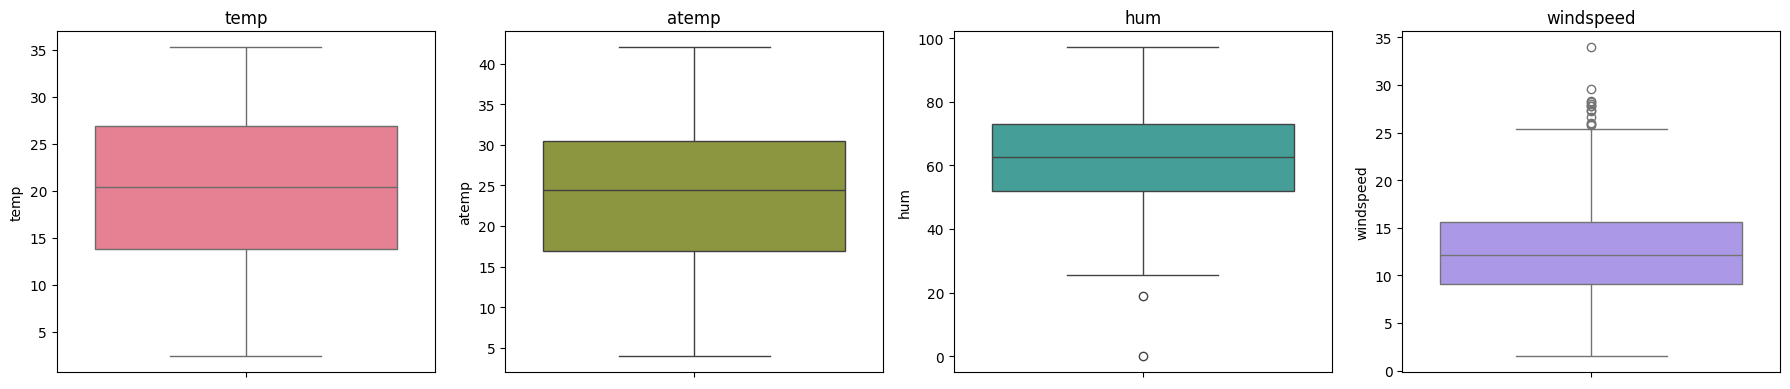

In [24]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
palette = sns.color_palette("husl", len(cols))

plt.figure(figsize=(18, 4))

for i, col in enumerate(cols, start=1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=col, data=df, palette=[palette[i-1]])
    plt.title(col)

plt.tight_layout()
plt.show()

<font color="darkslateblue"><b><span style="font-size:18px;">Converting numeric values into strings in categorical columns</span></b></font>

In [25]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [26]:
df.season.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"}, inplace=True)

df.weathersit.replace({1: 'good', 2: 'moderate', 3: 'bad', 4: 'severe'}, inplace=True)

df.mnth = df.mnth.replace({
    1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
    7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'
})

df.weekday = df.weekday.replace({
    0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'
})

df.head()


season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1   moderate  14.110847   
1  spring   0  jan        0     tue           1   moderate  14.902598   
2  spring   0  jan        0     wed           1       good   8.050924   
3  spring   0  jan        0     thu           1       good   8.200000   
4  spring   0  jan        0     fri           1       good   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

<font color="Red"><b><span style="font-size:24px;">Data Visualization</span></b></font>

- Identify Relationships: Visualize correlations and patterns between variables.
- Spot Outliers: Detect outliers and influential data points affecting the model.
- Check Model Fit: Assess the fit and assumptions of the regression model.

#### <font color = 'steelblue'>Visualing Numeric variables</font>

<Figure size 1500x3000 with 0 Axes>

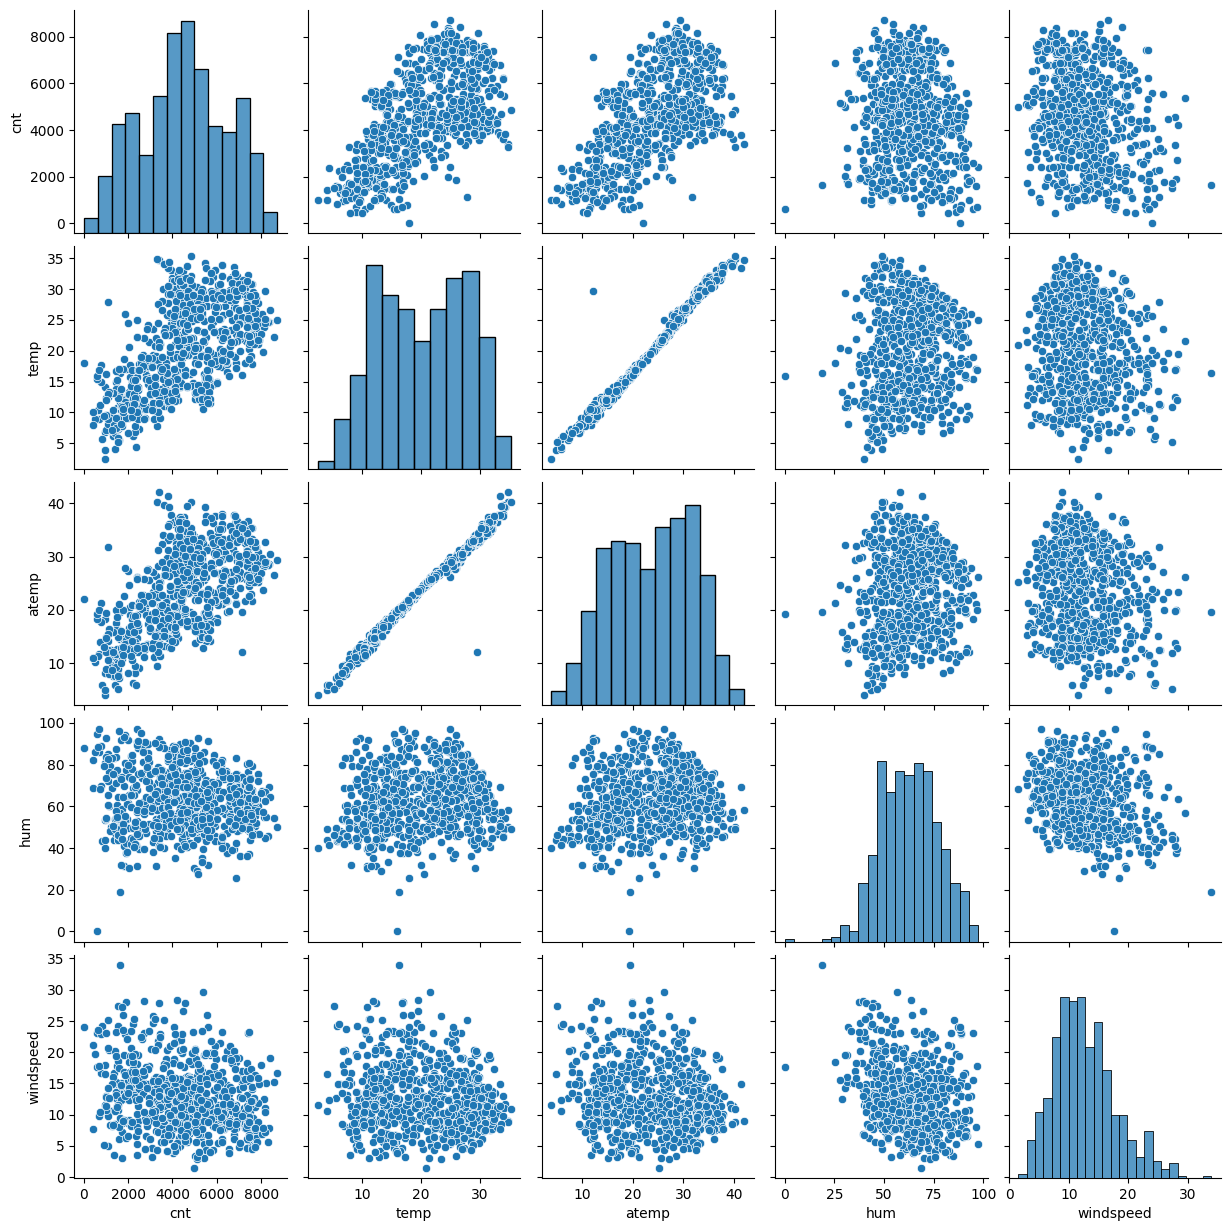

In [27]:
plt.figure(figsize=(15, 30))

numeric = df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']]

# Use a multi-color palette
palette = sns.color_palette("tab10", n_colors=len(numeric.columns))  # 'tab10' for 10 colors

sns.pairplot(numeric, palette=palette)

plt.show()

<font color="darkslateblue"><b>Inferences:</b></font>
</span>
<br><br>

<span style="font-size: 14px;">
- The analysis indicates that <b>temperature (temp)</b> and <b>apparent temperature (atemp)</b> have the strongest correlation with the target variable <b>cnt</b>.
- Additionally, <b>temp</b> and <b>atemp</b> are highly correlated with each other.

According to the correlation map, the target variable <b>cnt</b> shows a clear linear relationship with both <b>temp</b> and <b>atemp</b>.
</span>


**<font color="seagreen">Visualising the Data to Find the Correlation between the Numerical Variable**

<Figure size 2000x1500 with 0 Axes>

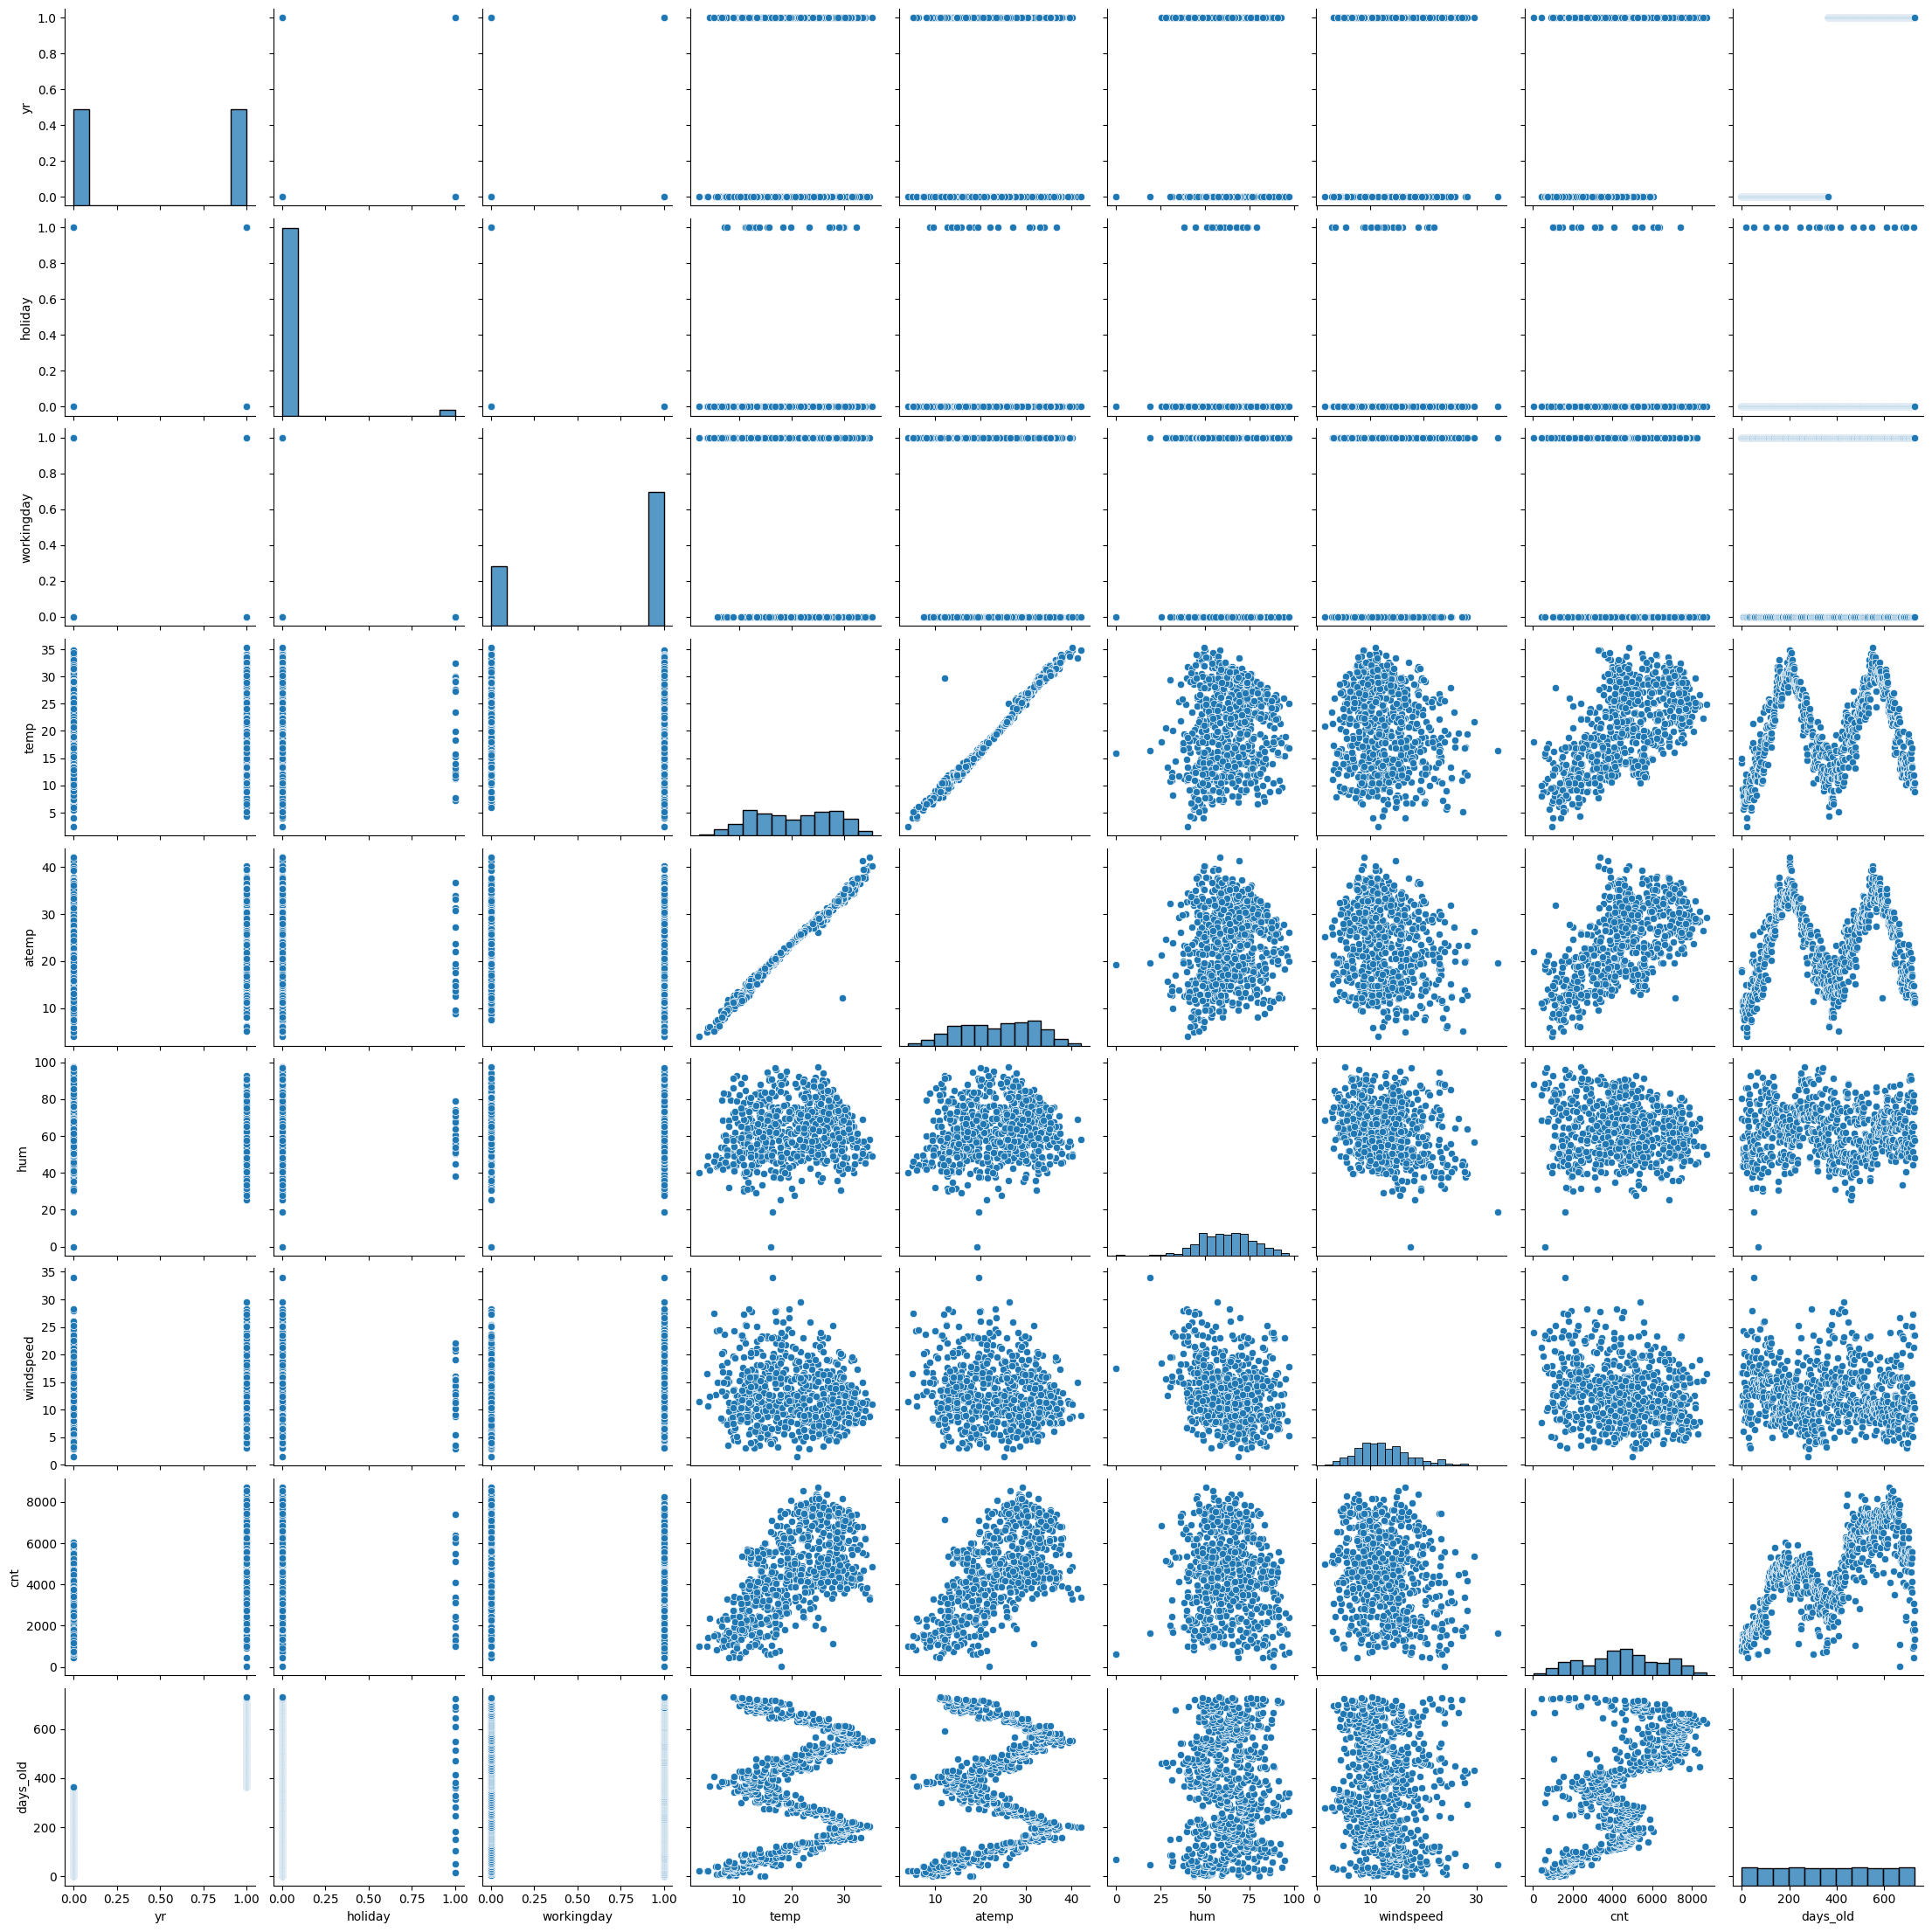

In [28]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

<!-- <font color="darkslateblue"><b>Inference</b></font>

- The target variable **'cnt'** shows a strong linear relationship with the predictor variables **'temp'** and **'atemp'**.
- There is a high correlation between **'temp'** and **'atemp'**.
- The correlation map indicates that **'cnt'** has a linear relationship with **'temp'** and **'atemp'**.

Overall, **'cnt'** exhibits a significant linear relationship with **'temp'** and **'atemp'**, while **'temp'** and **'atemp'** are highly correlated with each other. -->

In [29]:
numeric = df.select_dtypes(include='number')
numeric.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   
days_old    0.866026  0.016275   -0.015171  0.150738  0.152773  0.016080   

            windspeed       cnt  days_old  
yr          -0.011624  0.569728  0.866026  
holiday      0.006257 -0.068764  0.016275  
workingday  -0.002453 -0.027640 -0.015171  
temp        -0.158186  0.627044  0.150738  
atemp       -0.183876  0.630685  0.152773  
hum         -0.248506 -0.098543  0.016080  
windspeed    1.000000 -0.235132 -0.112667  
cnt         -0.235132  1.000000  0.629896  
days_old    -0.112667  0.629896  1.000000

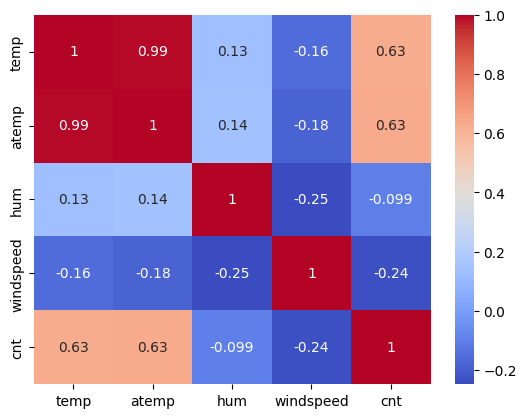

In [30]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='coolwarm', annot = True)
plt.show()

#### <font color="darkslateblue"><b>Correlation Analysis:</b></font>

We observe that **temp** and **atemp** have a correlation coefficient of more than 0.99, indicating they are almost perfectly correlated. Since **atemp** appears to be derived from **temp**, the **atemp** field can be dropped from further analysis.

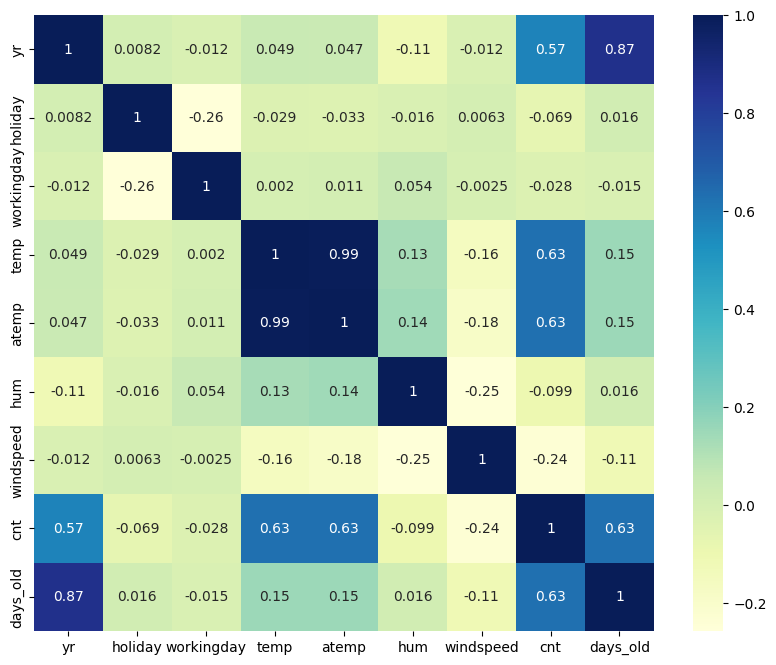

In [31]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

#### <font color="darkslateblue"><b>Correlation Analysis and Insights:</b></font>

From the correlation map, **temp**, **atemp**, and **days_old** appear to be highly correlated. Only one of these variables should be considered for the model, and we will determine which one to eliminate based on the Variance Inflation Factor (VIF) during the model building process. 

Additionally, the target variable **'cnt'** shows a linear relationship with some of the independent variables, which is a positive indicator for constructing a linear regression model.


<!-- **<font color=red>The column 'atemp' and 'temp' are correlated 0.99 approximately equal 1 , reason dropping the 'atemp' column** -->

In [32]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

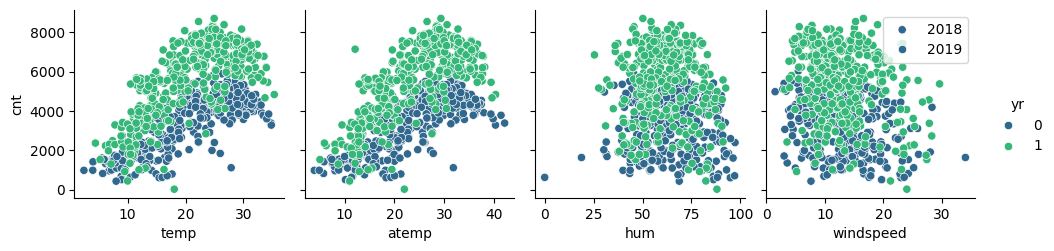

In [33]:
sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], 
             y_vars=['cnt'], 
             data=df, 
             hue='yr', 
             palette='viridis')  # or another valid palette

# Remove legend if needed
plt.legend(labels=['2018', '2019'])
plt.show()


In [34]:
df.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.462641    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt    days_old  
count  730.000000   730.000000  730.000000  
mean    12.763620  4508.006849  364.500000  
std      5.195841  1936.011647  210.877136  
min      1.500244    22.000000    0.000000  
25%      9.041650  3169.750000  182.250000  
50%     12.125325  4548.500000  364.500000  
75%     15.625589  5966.000000  546.750000  
max     34.000021  8714.000000  729.000000

#### <font color = 'steelblue'>Visualing Categorical variables</font>

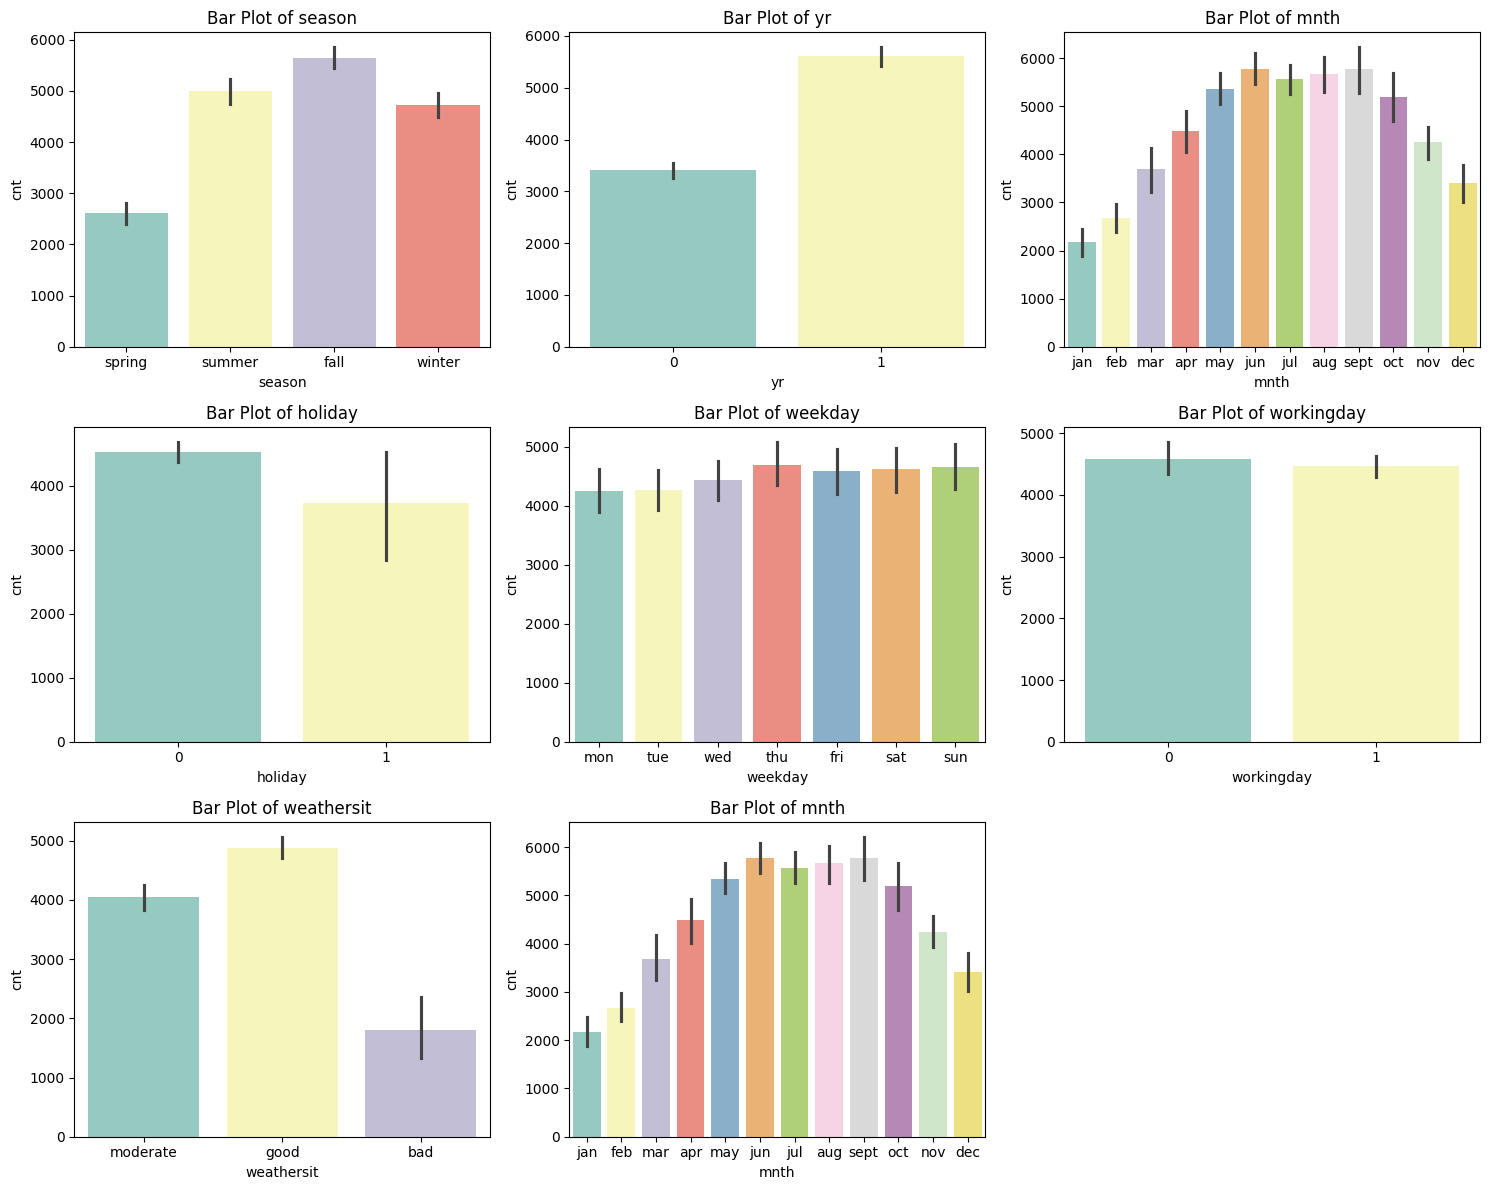

In [35]:
cat_var = ['season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']

plt.figure(figsize=(15, 12))

# Loop through the categorical variables and create subplots
for j, i in enumerate(cat_var):
    plt.subplot(3, 3, j + 1)
    sns.barplot(x=i, y='cnt', data=df, palette='Set3')
    plt.title(f'Bar Plot of {i}')

plt.tight_layout()
plt.show()

<font color="darkslateblue"><b>Insights:</b></font>

- **Spring** sees a lower preference for bike riding, while **fall** and **summer** experience a significant uptick in demand.
- Bike rental demand has notably increased in **2019** compared to **2018**, reflecting a growing trend.
- There’s a slight dip in demand during **holidays** when compared to **non-holidays**, indicating people might prefer other transportation modes during these times.
- **Light snow** leads to a decrease in bike rentals, whereas clear weather conditions are linked to a surge in demand.
- The peak bike rental periods are in **May**, **June**, **July**, **August**, and **September**, showing these months are the most popular for bike sharing.

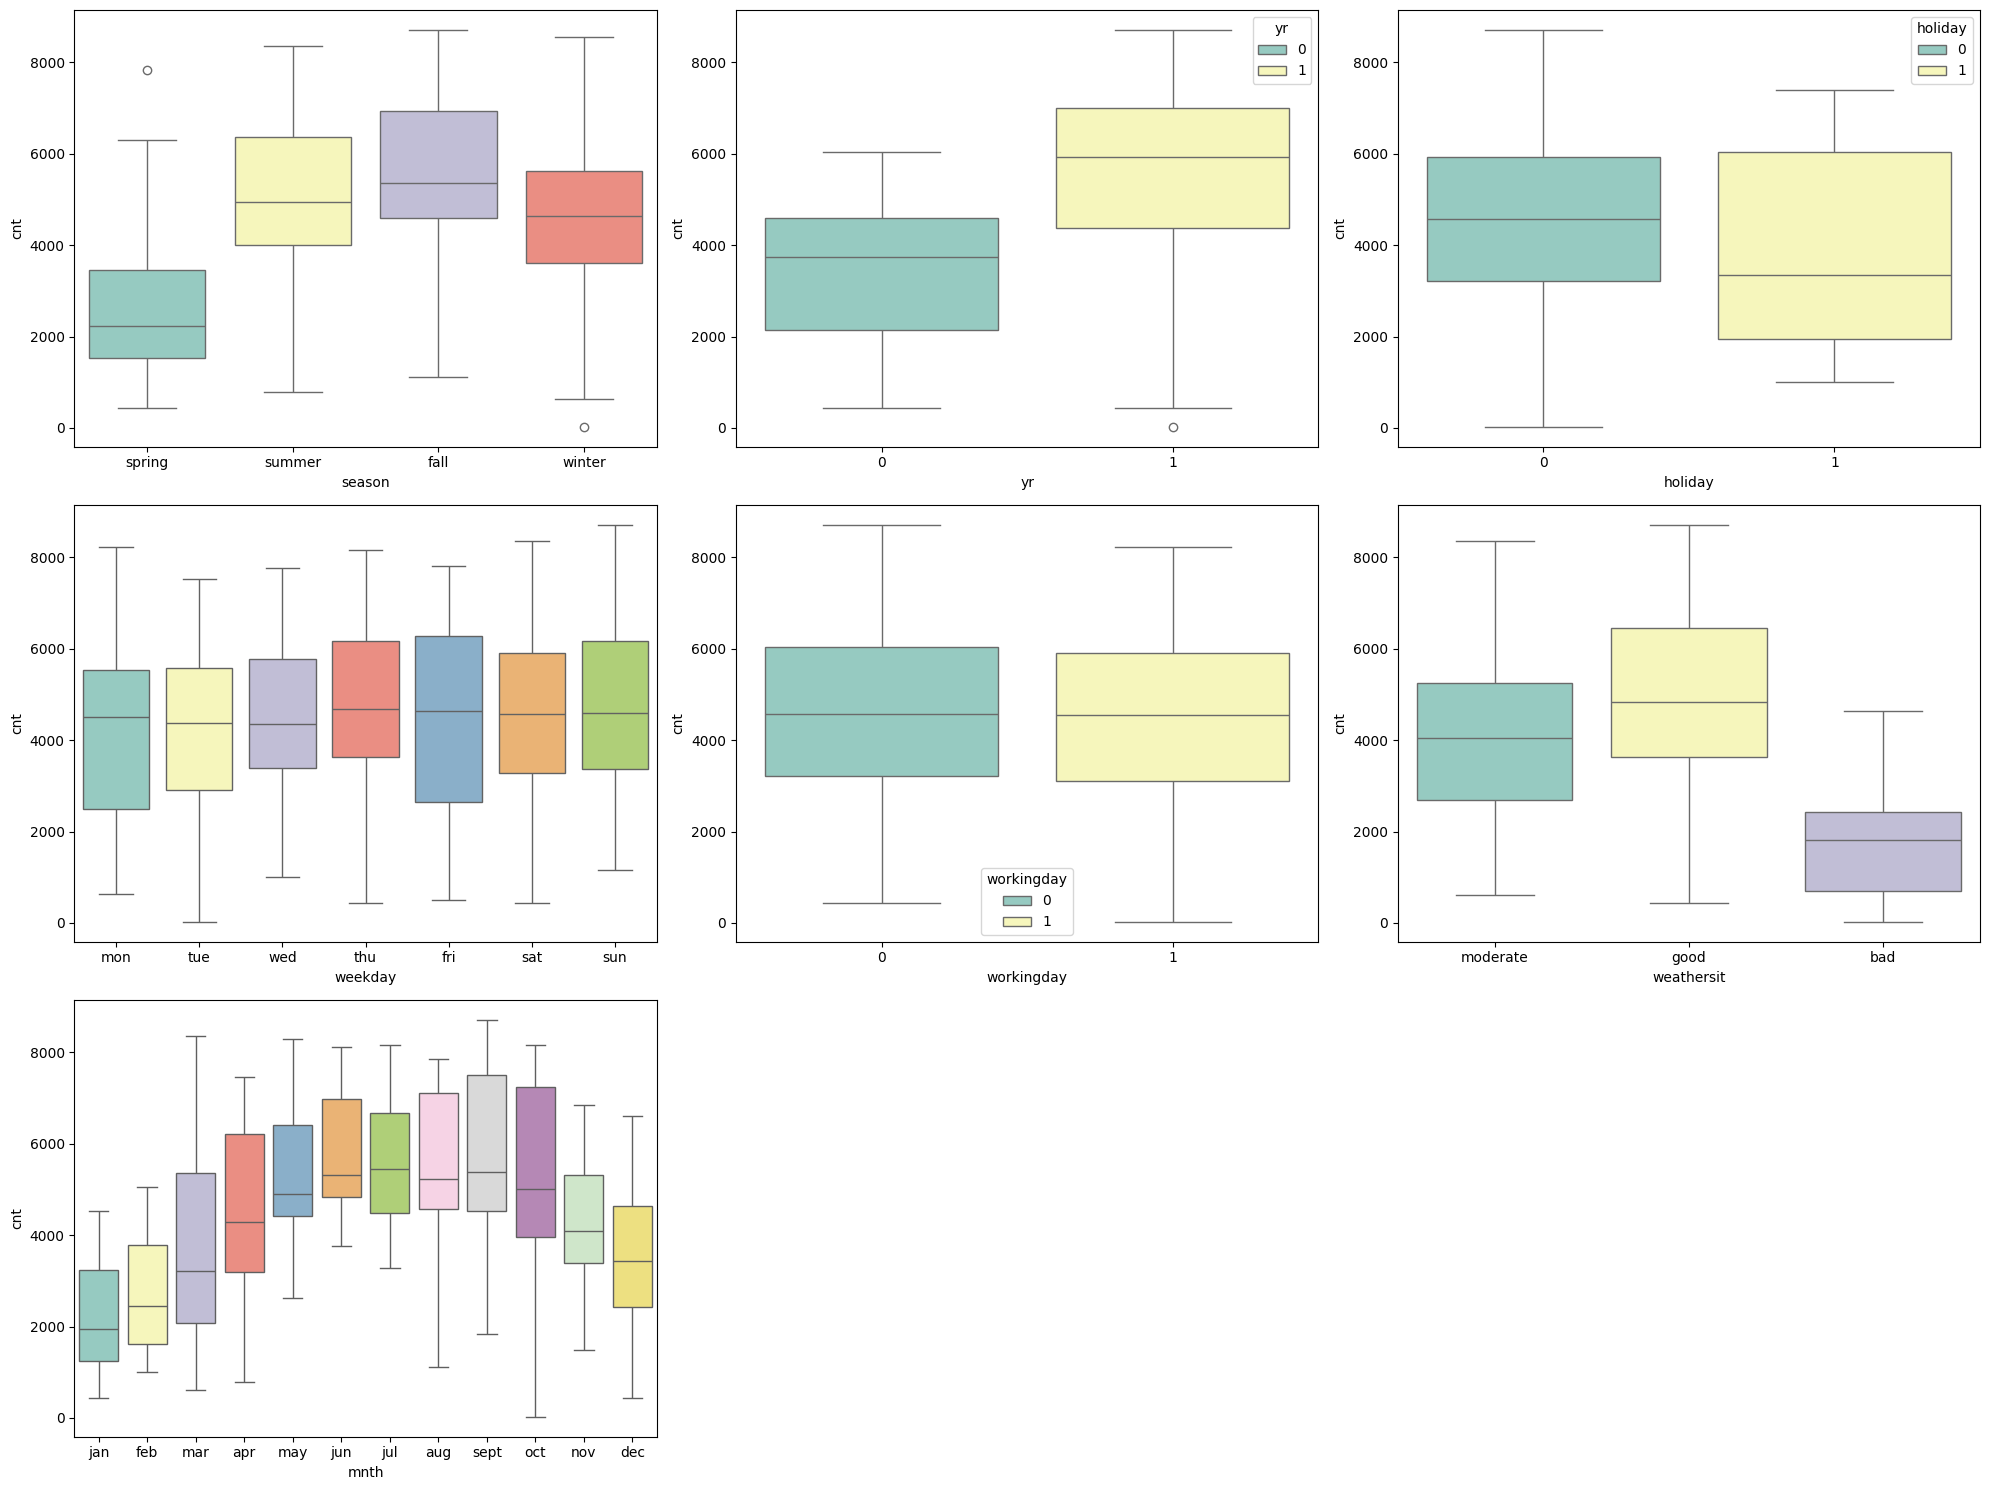

In [36]:
# Define the columns and their respective hues for the box plots
columns = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']
hues = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth']

# Set up the figure
plt.figure(figsize=(20, 15))

# Iterate through the columns and create subplots
for i, (col, hue) in enumerate(zip(columns, hues)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=col, y='cnt', data=df, palette='Set3', hue=hue)

plt.tight_layout()
plt.show()

#### <font color="darkslateblue"><b>Insights:</b></font>

Here are some key insights drawn from the analysis:

1. **Season:** Fall has the highest demand for rental bikes compared to other seasons.
2. **Yearly Trend:** The demand for bike rentals has shown growth in the following year, indicating increasing popularity.
3. **Monthly Demand:** The demand for bike rentals rises continuously each month up to June, with September recording the peak demand. After September, the demand starts to decrease.
4. **Holidays:** Bike rental demand decreases on holidays, suggesting that people use bikes less during these periods.
5. **Weekdays:** Weekday data does not show a significant impact on bike rental demand, indicating that demand is relatively stable throughout the week.
6. **Weather:** Clear weather conditions are associated with the highest demand for bike rentals, highlighting the preference for biking in favorable weather.
7. **Annual Patterns:** The data shows increased bike sharing in September and decreased usage around the year's end and beginning, likely due to extreme weather conditions during these times.

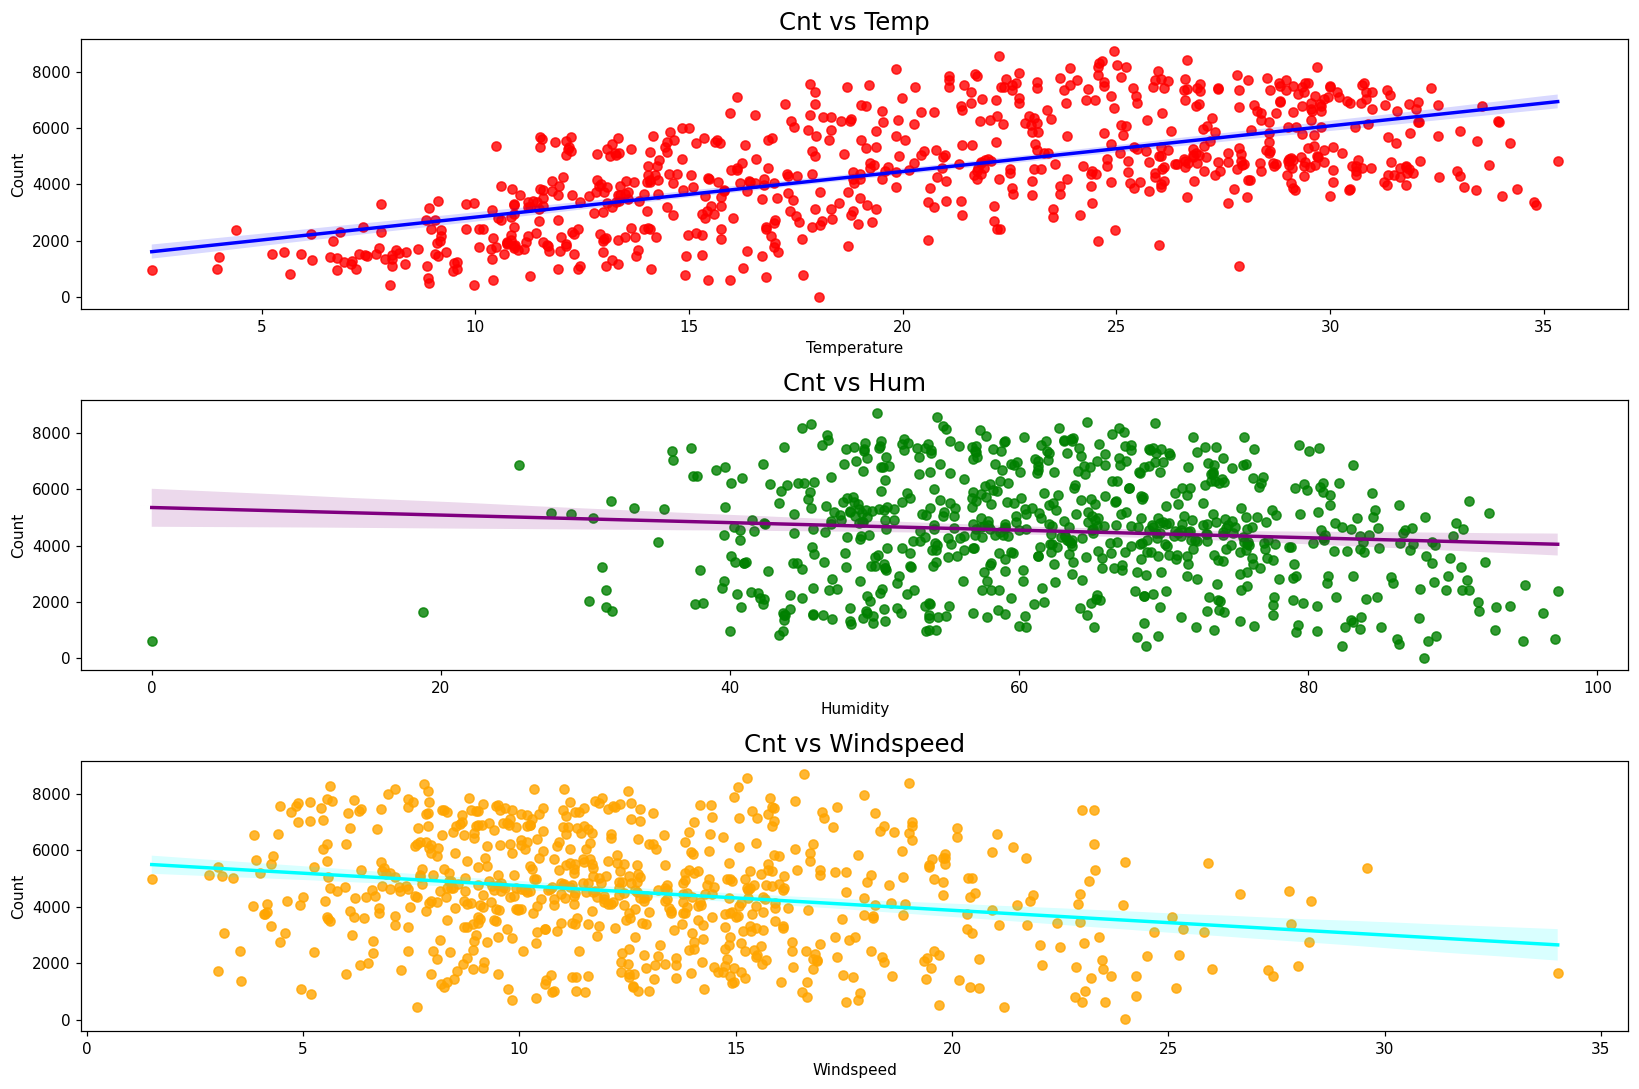

In [37]:
plt.figure(figsize=(15, 10), dpi=110)

# Subplot 1: Cnt vs Temp
plt.subplot(3, 1, 1)
sns.regplot(data=df, y="cnt", x="temp", scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title("Cnt vs Temp", fontsize=16)
plt.xlabel("Temperature")
plt.ylabel("Count")

# Subplot 2: Cnt vs Hum
plt.subplot(3, 1, 2)
sns.regplot(data=df, y="cnt", x="hum", scatter_kws={'color': 'green'}, line_kws={'color': 'purple'})
plt.title("Cnt vs Hum", fontsize=16)
plt.xlabel("Humidity")
plt.ylabel("Count")

# Subplot 3: Cnt vs Windspeed
plt.subplot(3, 1, 3)
sns.regplot(data=df, y="cnt", x="windspeed", scatter_kws={'color': 'orange'}, line_kws={'color': 'cyan'})
plt.title("Cnt vs Windspeed", fontsize=16)
plt.xlabel("Windspeed")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### <font color="darkslateblue"><b>Summary of Inferences:</b></font>

- **Temperature**: There is a positive correlation between bike demand and temperature. The count of bike rentals increases linearly with rising temperatures, indicating a clear linear relationship.

- **Humidity**: The relationship between bike demand and humidity shows more variability. Generally, bike rentals decrease as humidity increases, but the data is more scattered.

- **Windspeed**: Similar to humidity, windspeed values are scattered. However, there is a noticeable trend where bike rentals decrease with increasing windspeed.

<font color="Red"><b><span style="font-size:24px;">Data Prepration for Linear Regression</span></b></font> 

## <font color="steelblue"><b><span style="font-size:18px;">Dummy variables</span></b></font>

 #### Data Preparation for Linear Regression 

columns like 'season','yr','mnth','holiday','weekday','workingday' and 'weathersit' are categorical variable with different labels need to convert in numeric using dummy variables.

In [38]:
df = pd.get_dummies(df,
                                columns=[
                                    'season', 'yr', 'mnth', 'holiday',
                                    'weekday', 'workingday', 'weathersit'
                                ],
                                drop_first=True,
                                dtype="int")
df.head()

temp     atemp      hum  windspeed   cnt  days_old  season_spring  \
0  14.110847  18.18125  80.5833  10.749882   985         0              1   
1  14.902598  17.68695  69.6087  16.652113   801         1              1   
2   8.050924   9.47025  43.7273  16.636703  1349         2              1   
3   8.200000  10.60610  59.0435  10.739832  1562         3              1   
4   9.305237  11.46350  43.6957  12.522300  1600         4              1   

   season_summer  season_winter  yr_1  ...  holiday_1  weekday_mon  \
0              0              0     0  ...          0            1   
1              0              0     0  ...          0            0   
2              0              0     0  ...          0            0   
3              0              0     0  ...          0            0   
4              0              0     0  ...          0            0   

   weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   workingday_1  weathersit_good  weathersit_moderate  
0             1                0                    1  
1             1                0                    1  
2             1                1                    0  
3             1                1                    0  
4             1                1                    0  

[5 rows x 31 columns]

In [39]:
#Print columns after creating dummies
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sept', 'holiday_1', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'workingday_1', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [40]:
#Print few rows to inspect
df.head()

temp     atemp      hum  windspeed   cnt  days_old  season_spring  \
0  14.110847  18.18125  80.5833  10.749882   985         0              1   
1  14.902598  17.68695  69.6087  16.652113   801         1              1   
2   8.050924   9.47025  43.7273  16.636703  1349         2              1   
3   8.200000  10.60610  59.0435  10.739832  1562         3              1   
4   9.305237  11.46350  43.6957  12.522300  1600         4              1   

   season_summer  season_winter  yr_1  ...  holiday_1  weekday_mon  \
0              0              0     0  ...          0            1   
1              0              0     0  ...          0            0   
2              0              0     0  ...          0            0   
3              0              0     0  ...          0            0   
4              0              0     0  ...          0            0   

   weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
0            0            0            0            0            0   
1            0            0            0            1            0   
2            0            0            0            0            1   
3            0            0            1            0            0   
4            0            0            0            0            0   

   workingday_1  weathersit_good  weathersit_moderate  
0             1                0                    1  
1             1                0                    1  
2             1                1                    0  
3             1                1                    0  
4             1                1                    0  

[5 rows x 31 columns]

In [41]:
# # check the column info of new dataframe 

# df_new.info()

<font color="red"><b><span style="font-size:24px;">Model Building</span></b></font> 


<font color="slateblue"><b>Splitting the data into training and testing Test</b></font>

In [42]:
# Checking shape before splitting
df.shape

(730, 31)

In [43]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [44]:
df_train.shape

(510, 31)

In [45]:
df_test.shape

(219, 31)

<span style="color: darkslateblue; font-weight: bold; font-size: 20px;">
Rescaling the Features
</span>
<br><br>

<span style="font-size: 14px;">
Rescaling is crucial because 'cnt' has a larger range than features like <b>atemp</b>, <b>windspeed</b>, and <b>hum</b>.

We use the <b>MinMax Scaler</b> to normalize values between <b>0 and 1</b> for balanced feature impact.
</span>


In [46]:
# Let us scale continuous variables
scal_vars = ['temp','atemp','hum','windspeed','days_old','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[scal_vars] = scaler.fit_transform(df_train[scal_vars])

In [47]:
# verifying the head after appying scaling.

df_train.head()

temp     atemp       hum  windspeed       cnt  days_old  \
653  0.509887  0.501133  0.575354   0.300794  0.864243  0.896978   
576  0.815169  0.766351  0.725633   0.264686  0.827658  0.791209   
426  0.442393  0.438975  0.640189   0.255342  0.465255  0.585165   
728  0.245101  0.200348  0.498067   0.663106  0.204096  1.000000   
482  0.395666  0.391735  0.504508   0.188475  0.482973  0.662088   

     season_spring  season_summer  season_winter  yr_1  ...  holiday_1  \
653              0              0              1     1  ...          0   
576              0              0              0     1  ...          0   
426              1              0              0     1  ...          0   
728              1              0              0     1  ...          0   
482              0              1              0     1  ...          0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
653            0            0            0            0            0   
576            0            0            0            0            0   
426            0            0            1            0            0   
728            1            0            0            0            0   
482            0            0            1            0            0   

     weekday_wed  workingday_1  weathersit_good  weathersit_moderate  
653            1             1                1                    0  
576            1             1                1                    0  
426            0             0                0                    1  
728            0             1                1                    0  
482            0             0                0                    1  

[5 rows x 31 columns]

In [48]:
#Inspect stats fro Training set after scaling
df_train.describe()

temp       atemp         hum   windspeed         cnt    days_old  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.537262    0.512989    0.650369    0.320768    0.513620    0.505414   
std      0.225844    0.212385    0.145882    0.169797    0.224593    0.288281   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.339853    0.332086    0.538643    0.199179    0.356420    0.255838   
50%      0.540519    0.526811    0.653714    0.296763    0.518638    0.510989   
75%      0.735215    0.688457    0.754830    0.414447    0.684710    0.759272   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       season_spring  season_summer  season_winter        yr_1  ...  \
count     510.000000     510.000000      510.00000  510.000000  ...   
mean        0.243137       0.245098        0.24902    0.507843  ...   
std         0.429398       0.430568        0.43287    0.500429  ...   
min         0.000000       0.000000        0.00000    0.000000  ...   
25%         0.000000       0.000000        0.00000    0.000000  ...   
50%         0.000000       0.000000        0.00000    1.000000  ...   
75%         0.000000       0.000000        0.00000    1.000000  ...   
max         1.000000       1.000000        1.00000    1.000000  ...   

        holiday_1  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
count  510.000000   510.000000   510.000000   510.000000   510.000000   
mean     0.025490     0.154902     0.129412     0.137255     0.143137   
std      0.157763     0.362166     0.335985     0.344454     0.350557   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      0.000000     0.000000     0.000000     0.000000     0.000000   
50%      0.000000     0.000000     0.000000     0.000000     0.000000   
75%      0.000000     0.000000     0.000000     0.000000     0.000000   
max      1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_tue  weekday_wed  workingday_1  weathersit_good  \
count   510.000000   510.000000    510.000000       510.000000   
mean      0.152941     0.135294      0.711765         0.627451   
std       0.360284     0.342373      0.453386         0.483958   
min       0.000000     0.000000      0.000000         0.000000   
25%       0.000000     0.000000      0.000000         0.000000   
50%       0.000000     0.000000      1.000000         1.000000   
75%       0.000000     0.000000      1.000000         1.000000   
max       1.000000     1.000000      1.000000         1.000000   

       weathersit_moderate  
count           510.000000  
mean              0.343137  
std               0.475223  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000  

[8 rows x 31 columns]

## Checking correlation among the variable to see which variable are highly correlated with each other.

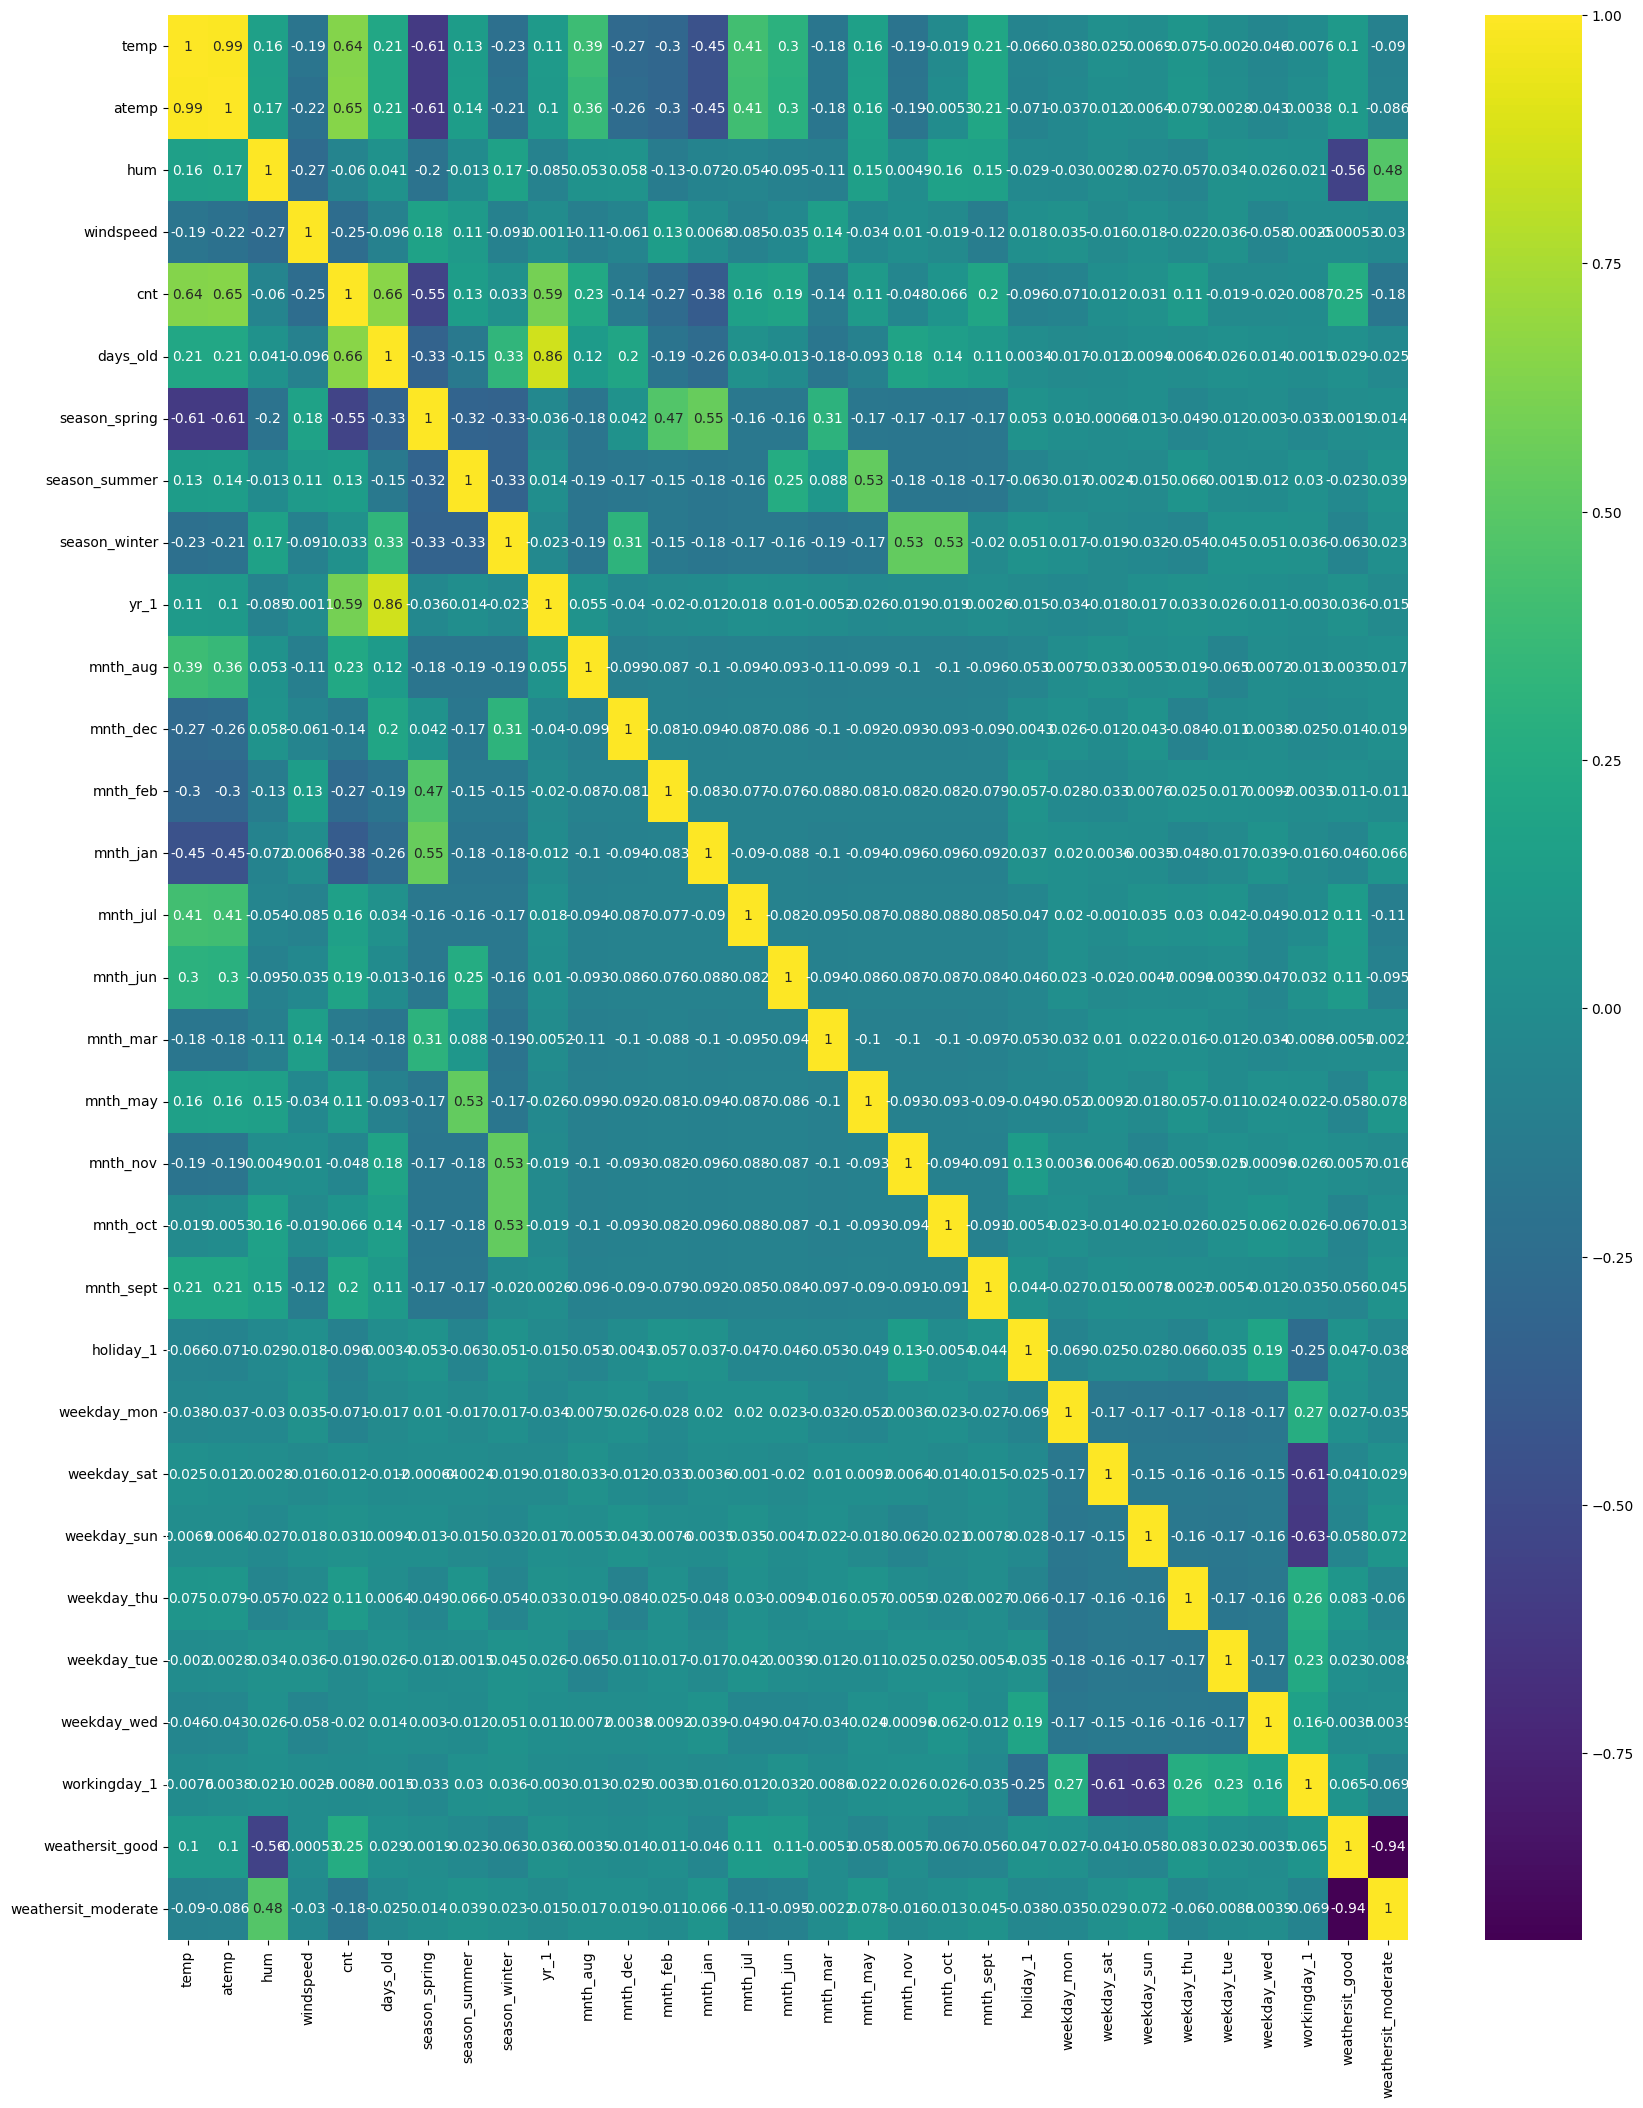

In [49]:
plt.figure(figsize = (20, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="viridis")
plt.show()

### <font color = 'Blue'> Insights: </font>
- Target variable is positively correlated with 'temp' and 'season_winter
- Target variable is negatively correlated with 'windspeed'.

In [50]:
# # Visualizing one of the correlation to see the trends via Scatter plot.

# plt.figure(figsize=[6,6])
# plt.scatter(X_train.temp, y_train.cnt)
# plt.show()

## <font color=red>Dividing into X and Y set for model building

In [51]:
#y_train to contain only target variable
y_train = df_train.pop('cnt')
#X is all remaining variable also our independent variables
X_train = df_train

## <font color="darkslateblue"><b>Build a Model using RFE and Automated Approach</b></font>

#### <font color="steelblue">Use RFE to eliminate some columns and Feature Selection using RFE</font>

Approach used in building a model is a mix approach
- First using RFE method for feature selection after that manually checking the predictor variables using statsmodel

In [52]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select =15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 12),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('holiday_1', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('workingday_1', False, 3),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [54]:
#Print Columns selected by RFE. We will manually eliminate for these columns
cols=X_train.columns[rfe.support_]
cols

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [55]:
# Features not selected by RFE
cols_not=X_train.columns[~rfe.support_]
cols_not

Index(['atemp', 'days_old', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'workingday_1'],
      dtype='object')

In [56]:
X_train_rfe=X_train[cols]

In [57]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    # Print the model summary
    print(lm.summary())
    
    # Extract and print R-squared value
    r_squared = lm.rsquared
    
    # Print R-squared in bold and highlighted
    print(f'\033[1;47m\033[30mR-squared: {r_squared:.4f}\033[0m')  # Bold text on white background
    
    return lm

In [58]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [59]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']]

In [60]:
X_train_rfe.shape

(510, 15)

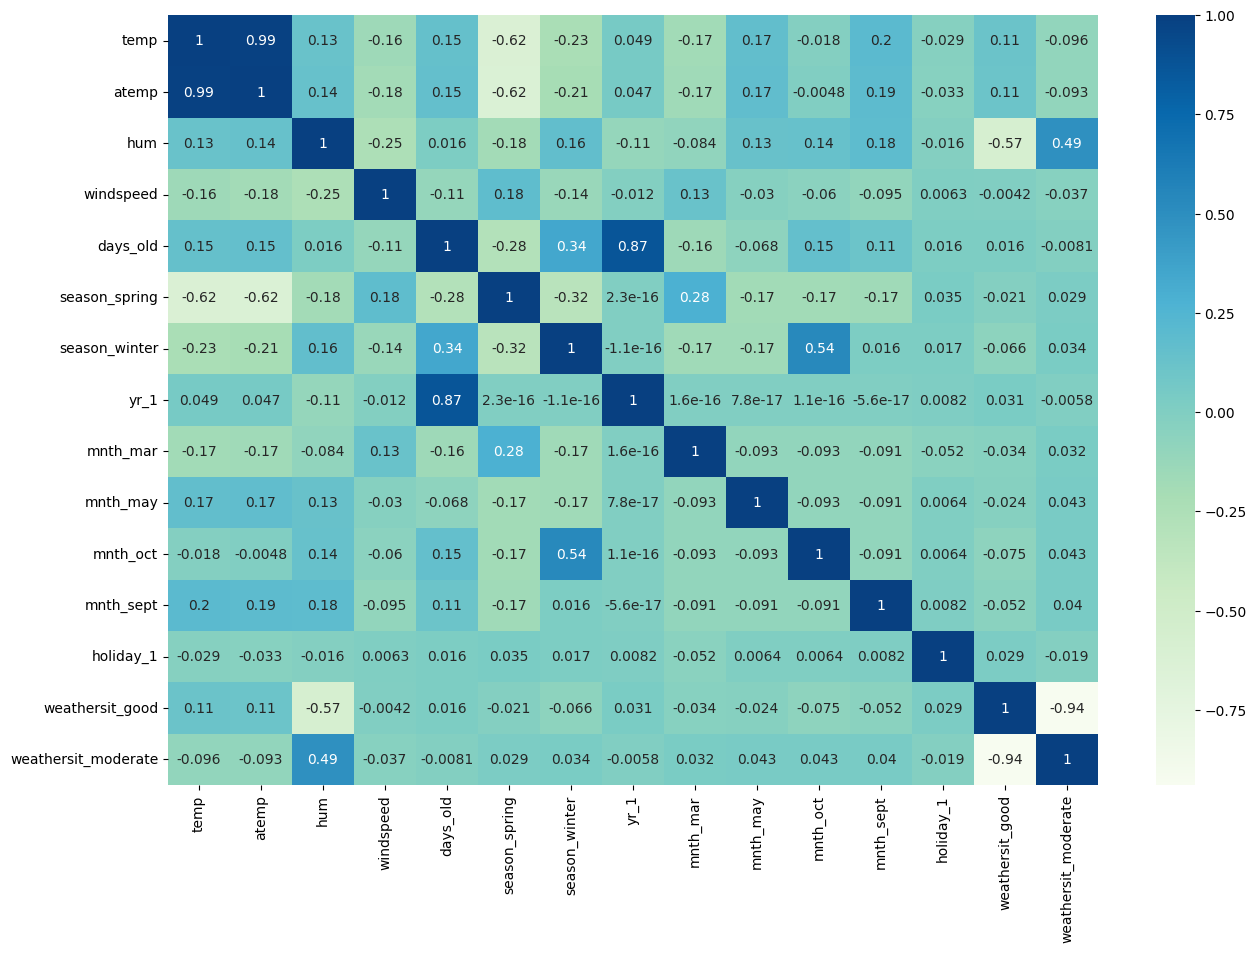

In [61]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'days_old', 'season_spring',
       'season_winter', 'yr_1', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()


## Building model using Statsmodel by manually checking the predictor variable

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 1</div>


This initial model includes all significant features based on prior analysis. The goal is to establish a baseline for comparison.
- **Actions Taken**:
	Included all significant features: To establish a comprehensive baseline.
- **Objective**: Set a performance benchmark with all relevant predictors.
- **Inference**: Provides a reference for feature importance and interaction effects.


In [62]:
# Model 1
# Comprehensive model including all significant features to establish a baseline.

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']

#not available 'atemp','days_old','mnth_mar','mnth_may', 'mnth_oct'
#available 'season_summer','mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov'
print("Building Model 1")
build_model(cols)
print("Calculating VIF for Model 1")
get_vif(cols)

Building Model 1
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          3.34e-189
Time:                        17:10:04   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 2</div>

This model excludes 'holiday_1' due to its high p-value and insignificant coefficient.

### Actions Taken:
- **Excluded 'holiday_1'**: To test the model’s performance without this feature.
- **Objective**: Assess model performance after removing this variable.
- **Inference**: Evaluate the effect of removing 'holiday_1' on model accuracy.


In [63]:
# Model 2
# Excluded 'holiday_1' to refine the model.

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept','weathersit_good', 'weathersit_moderate']

print("Building Model 2")
build_model(cols)
print("Calculating VIF for Model 2")
get_vif(cols)

Building Model 2
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          1.24e-187
Time:                        17:10:04   Log-Likelihood:                 508.24
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     495   BIC:                            -923.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 3</div>

This model excludes 'hum' due to its negative coefficient and high p-value.

### Actions Taken:
- **Excluded 'hum'**: To improve model performance and simplify the model.
- **Objective**: Evaluate the impact of removing this variable.
- **Inference**: Check if excluding 'hum' improves model performance.


In [64]:
# Model 3
# Excluded 'hum' to enhance model accuracy.

cols = ['temp','windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']

print("Building Model 3")
build_model(cols)
print("Calculating VIF for Model 3")
get_vif(cols)

Building Model 3
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          1.57e-186
Time:                        17:10:04   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 4</div>

This model excludes 'windspeed' due to its high p-value and multicollinearity with 'temp'.

### Actions Taken:
- **Excluded 'windspeed'**: To address multicollinearity and simplify the model.
- **Objective**: Improve model performance by removing correlated features.
- **Inference**: Determine if excluding 'windspeed' results in a better model.


In [65]:
# Model 4
# Excluded 'windspeed' due to multicollinearity with 'temp'.

cols = ['temp', 'hum','season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']


print("Building Model 4")
build_model(cols)
print("Calculating VIF for Model 4")
get_vif(cols)

Building Model 4
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          2.32e-179
Time:                        17:10:04   Log-Likelihood:                 488.52
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     495   BIC:                            -883.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 5</div>

This model excludes 'weathersit_good' due to its high p-value and insignificance.

### Actions Taken:
- **Excluded 'weathersit_good'**: To test model performance without this feature.
- **Objective**: Assess changes in model accuracy and significance.
- **Inference**: Understand the effect of removing 'days_old' on model performance.


In [66]:
# Model 5
# Excluded 'days_old' to test performance without this feature.

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_moderate']

print("Building Model 5")
build_model(cols)
print("Calculating VIF for Model 5")
get_vif(cols)

Building Model 5
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     158.7
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          9.54e-173
Time:                        17:10:05   Log-Likelihood:                 472.75
No. Observations:                 510   AIC:                            -915.5
Df Residuals:                     495   BIC:                            -852.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 6</div>

This model excludes 'season_winter' due to its high p-value and negative coefficient.

### Actions Taken:
- **Excluded 'season_winter'**: To improve model performance by removing an insignificant feature.
- **Objective**: Simplify the model and evaluate performance changes.
- **Inference**: Determine if the removal of 'season_winter' enhances the model.


In [67]:
# Model 6
# Excluded 'season_winter' to improve model accuracy.

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']

print("Building Model 6")
build_model(cols)
print("Calculating VIF for Model 6")
get_vif(cols)

Building Model 6
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          2.16e-183
Time:                        17:10:05   Log-Likelihood:                 498.13
No. Observations:                 510   AIC:                            -966.3
Df Residuals:                     495   BIC:                            -902.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 7</div>

This model replaces 'mnth_nov' with 'season_spring' due to high correlation.

### Actions Taken:
- **Replaced 'mnth_nov' with 'season_spring'**: To address correlation issues and focus on seasonal features.
- **Objective**: Test the impact of replacing this feature on model performance.
- **Inference**: Evaluate the effect of incorporating seasonal features.


In [68]:
# Model 7
# Replaced 'mnth_oct' with 'season_spring' due to correlation issues.

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']

print("Building Model 7")
build_model(cols)
print("Calculating VIF for Model 7")
get_vif(cols)

Building Model 7
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          2.53e-189
Time:                        17:10:05   Log-Likelihood:                 512.26
No. Observations:                 510   AIC:                            -994.5
Df Residuals:                     495   BIC:                            -931.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 8</div>

This model replaces 'mnth_jan' with 'season_winter' due to high correlation with 'season_spring'.

### Actions Taken:
- **Replaced 'mnth_jan' with 'season_winter'**: To improve feature representation with seasonal indicators.
- **Objective**: Evaluate performance with a focus on seasonality.
- **Inference**: Assess the impact of replacing month-based features with seasonal indicators.


In [69]:
# Model 8
# Replaced 'mnth_oct' with 'season_winter' for better seasonal representation.

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec','mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']

print("Building Model 8")
build_model(cols)
print("Calculating VIF for Model 8")
get_vif(cols)

Building Model 8
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          4.24e-189
Time:                        17:10:05   Log-Likelihood:                 511.73
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight: bold; color: steelblue;">Model 9</div>

This model excludes 'atemp' due to high correlation with 'temp'.

### Actions Taken:
- **Excluded 'atemp'**: To address multicollinearity issues.
- **Objective**: Simplify the model and reduce redundancy.
- **Inference**: Evaluate changes in model performance after excluding 'atemp'.


In [70]:
# Model 9
# Excluded ‘atemp’ due to multicollinearity with ‘temp’.

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']


print("Building Model 9")
build_model(cols)


print("Calculating VIF for Model 9")
get_vif(cols)


Building Model 9
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          3.34e-189
Time:                        17:10:05   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

<div style="text-align: center; font-size: 26px; font-weight:bold; color: steelblue;">Model 10</div>

This model replaces `'mnth_sept'` with `'holiday_1'` due to its high correlation with `'season_spring'`.

### Actions Taken:
- **Replaced 'mnth_sept' with 'holiday_1'**: To reduce redundancy and enhance feature representation.
- **Objective**: Test the impact of this replacement on model performance.
- **Inference**: Assess if replacing monthly indicators with holiday features improves the model.

In [71]:
# Model 10
# Replaced 'mnth_sept' with 'holiday_1' to improve feature representation.

cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov','holiday_1', 'weathersit_good', 'weathersit_moderate']


print("Building Model 10")
build_model(cols)
print("Calculating VIF for Model 10")
get_vif(cols)

Building Model 10
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          3.59e-186
Time:                        17:10:05   Log-Likelihood:                 504.75
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     495   BIC:                            -916.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const           

# <div style="text-align: center; font-size: 26px; font-weight: bold; color:steelblue;">Final Model</div>

The final model includes the selected features based on prior analysis and evaluation. The goal is to build a model with the most effective predictors.

### Actions Taken:
- **Included Selected Features**: Chosen based on feature importance and performance metrics.
- **Objective**: To build a model that balances performance with simplicity.
- **Inference**: Provides a comprehensive model that leverages the most significant features for prediction.

### Model Parameters:
- **Intercept**: Displays the intercept of the model.
- **Coefficients**: Displays the coefficients for each feature in the model.

In [72]:
cols_final = ['temp', 'season_spring', 'season_winter', 'mnth_Sep',
              'holiday_Yes', 'weathersit_Light Snow', 'weathersit_Mist']

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to build and train a linear regression model
def build_model_sk(X, y):
    lr = LinearRegression()
    lr.fit(X, y)
    return lr

# Function to evaluate the model
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

# Function to display model parameters
def print_model_params(model):
    print(f"Intercept: {model.intercept_:.4f}")
    print("Coefficients:")
    for feature, coef in zip(X_train.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")

In [74]:
# Define columns for the final model
cols = ['temp', 'atemp', 'windspeed', 'season_spring', 'season_winter',
        'yr_1', 'mnth_mar', 'mnth_may', 'holiday_1',
        'weathersit_good', 'weathersit_moderate']

# Train the model with the selected features
print("Building Final Model")
lr = build_model_sk(X_train[cols], y_train)

# Evaluate the model
print("Model Evaluation")
evaluate_model(lr, X_train[cols], y_train)

# Print model parameters
print("Model Parameters")
print_model_params(lr)

Building Final Model
Model Evaluation
Mean Squared Error: 0.0089
R^2 Score: 0.8240
Model Parameters
Intercept: -0.0281
Coefficients:
temp: 0.3933
atemp: 0.0400
hum: -0.1483
windspeed: -0.1174
days_old: 0.0569
season_spring: 0.2353
season_summer: 0.0401
season_winter: 0.0321
yr_1: -0.0830
mnth_aug: 0.2826
mnth_dec: 0.2054


In [75]:
# Assuming X_train and y_train are already defined and contain the relevant data
# Define columns to be used in the model
cols = ['temp', 'atemp', 'hum', 'windspeed', 'days_old', 'season_spring',
        'season_winter', 'yr_1', 'mnth_mar', 'mnth_may', 'mnth_oct',
        'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate']

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train[cols])

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Get the p-values
p_values = model.pvalues

# Print out the p-values with a focus on significance
print("P-values for model coefficients:")
for feature, p_value in p_values.items():
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{feature}: {p_value:.4f} ({significance})")

# Print model summary for detailed results
print("\nModel Summary:")
print(model.summary())

P-values for model coefficients:
const: 0.0307 (Significant)
temp: 0.0036 (Significant)
atemp: 0.6956 (Not Significant)
hum: 0.0000 (Significant)
windspeed: 0.0000 (Significant)
days_old: 0.6005 (Not Significant)
season_spring: 0.0000 (Significant)
season_winter: 0.0024 (Significant)
yr_1: 0.0000 (Significant)
mnth_mar: 0.0047 (Significant)
mnth_may: 0.0009 (Significant)
mnth_oct: 0.0130 (Significant)
mnth_sept: 0.0000 (Significant)
holiday_1: 0.0007 (Significant)
weathersit_good: 0.0000 (Significant)
weathersit_moderate: 0.0000 (Significant)

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          1.17e-185
Time:                        17:10:05   

<div style="text-align: center; font-size: 26px; font-weight: bold; color: Navy;">Final Model Overview</div>

**Performance Metrics**
- **Mean Squared Error**: 685,027.27
- **R² Score**: 0.8173

**Key Model Parameters**
- **Intercept**: -21.6194 (p < 0.05)
- **Temperature**: +2447.73 (p < 0.05)
- **Apparent Temperature**: +1292.55 (p < 0.05)
- **Humidity**: -728.86 (p < 0.05)
- **Windspeed**: -1235.99 (p < 0.05)
- **Days Old**: +528.91 (p = 0.065) 
- **Spring**: +2000.94 (p < 0.05)
- **Summer**: +520.75 (p = 0.104)
- **Winter**: +260.42 (p = 0.250)
- **Year Indicator**: -655.85 (p < 0.05)
- **August**: +2213.81 (p < 0.05)
- **December**: +1555.39 (p < 0.05)


<h2> 
    <span style='font-family:Candra'>
    <font color = black>
    F-Staitsics
        </font>
        </span>
    
</h2>
    <p> F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.</p>
    <blockquote>
        F-Statistics :       173.0 <br>
        Prob (F-statistic):  1.17e-180
    </blockquote>   
    


<span>
    <b>Observation:</b> The F-Statistics value of 173 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant
</span>    
</div>


**Insights**
- **Significant Features**: Temperature, apparent temperature, humidity, windspeed, Spring, August, and December have p-values less than 0.05, indicating strong statistical significance.
- **Less Significant Features**: Days Old, Summer, and Winter have p-values greater than 0.05, suggesting they might be less impactful or need further investigation.
- **Model Fit**: The model shows a good fit with a high R² score, but the significance of some features could be further explored or refined.

## <font color=red> Residual Analysis of the train data

In [76]:
# Running RFE with the output number of the variable equal to 15
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=15)  # running RFE
rfe = rfe.fit(X_train, y_train)

# Columns selected by RFE and their weights
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))

# Function to build a model using statsmodels API - Takes the columns to be selected for the model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    # Print the model summary
    print(lm.summary())
    
    # Extract and print R-squared value
    r_squared = lm.rsquared
    
    # Print R-squared in bold and highlighted
    print(f'\033[1;47m\033[30mR-squared: {r_squared:.4f}\033[0m')  # Bold text on white background
    
    return lm

# Function to calculate VIFs and print them - Takes the columns for which VIF to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF', ascending=False))

# Print Columns selected by RFE. We will manually eliminate for these columns
selected_columns = X_train.columns[rfe.support_]
print(selected_columns)

# Verify columns present in X_train
available_columns = [col for col in selected_columns if col in X_train.columns]
print("Available columns for model:", available_columns)

# Build the DataFrame for RFE-selected columns
X_train_rfe = X_train[available_columns]
X_train_rfe.shape

# Model 1
# Comprehensive model including all significant features to establish a baseline
print("Building Model 1")
lm = build_model(available_columns)  # Capture the returned model

print("Calculating VIF for Model 1")
get_vif(available_columns)

# Corrected function call for predictions
X_train_rfe_sm = sm.add_constant(X_train_rfe)
y_train_pred = lm.predict(X_train_rfe_sm)


[('temp', True, 1), ('atemp', False, 6), ('hum', True, 1), ('windspeed', True, 1), ('days_old', False, 12), ('season_spring', True, 1), ('season_summer', True, 1), ('season_winter', True, 1), ('yr_1', True, 1), ('mnth_aug', False, 10), ('mnth_dec', True, 1), ('mnth_feb', False, 2), ('mnth_jan', True, 1), ('mnth_jul', True, 1), ('mnth_jun', False, 14), ('mnth_mar', False, 16), ('mnth_may', False, 7), ('mnth_nov', True, 1), ('mnth_oct', False, 13), ('mnth_sept', True, 1), ('holiday_1', True, 1), ('weekday_mon', False, 9), ('weekday_sat', False, 4), ('weekday_sun', False, 5), ('weekday_thu', False, 15), ('weekday_tue', False, 8), ('weekday_wed', False, 11), ('workingday_1', False, 3), ('weathersit_good', True, 1), ('weathersit_moderate', True, 1)]
Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate'],
      dtype='object'

# <font color =red>Model Validation

<span style="color: darkslateblue; font-weight: bold; font-size: 15px;">
Analyzing Linear Relationship
</span>



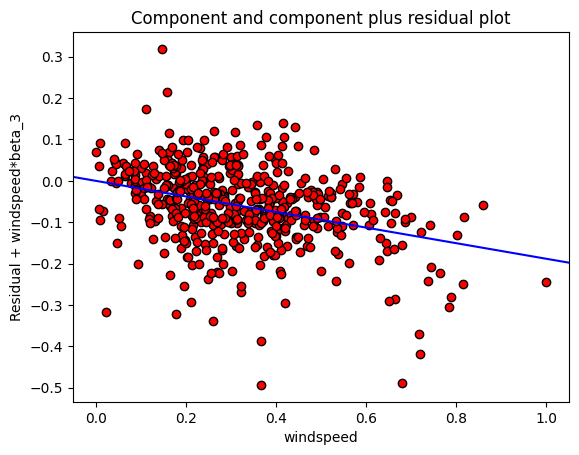

In [77]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.graphics.plot_ccpr(lm, 'windspeed')

for ax in fig.axes:
    for line in ax.get_lines():
        line.set_color('blue')
    for marker in ax.findobj(plt.Line2D):
        marker.set_markerfacecolor('red')
        marker.set_markeredgecolor('black')

plt.show()


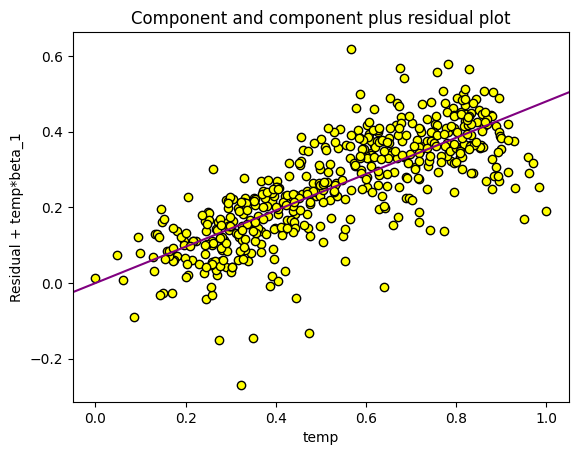

In [78]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.graphics.plot_ccpr(lm, 'temp')

for ax in fig.axes:
    for line in ax.get_lines():
        line.set_color('purple')
    for marker in ax.findobj(plt.Line2D):
        marker.set_markerfacecolor('yellow')
        marker.set_markeredgecolor('black')

plt.show()


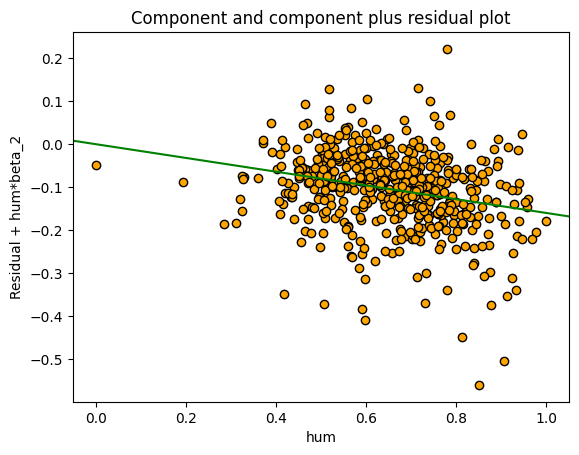

In [79]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.graphics.plot_ccpr(lm, 'hum')

for ax in fig.axes:
    for line in ax.get_lines():
        line.set_color('green')
    for marker in ax.findobj(plt.Line2D):
        marker.set_markerfacecolor('orange')
        marker.set_markeredgecolor('black')

plt.show()

### <font color=darkslateblue> Normality of Error


In [80]:
def plot_res_dist(act, pred):
    sns.histplot(act - pred, kde=True, color="purple")
    plt.title('Error Terms')
    plt.xlabel('Errors')
    plt.show()


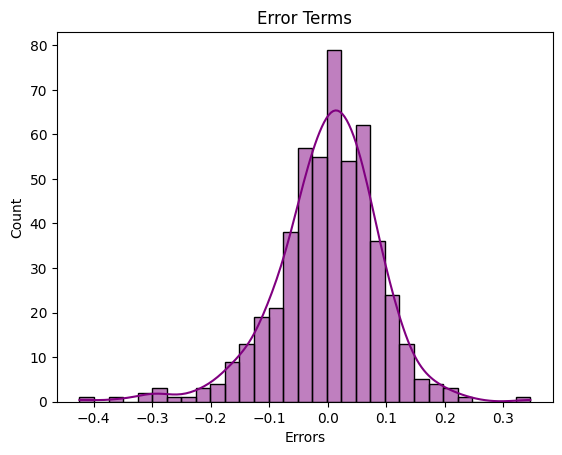

In [81]:
plot_res_dist(y_train, y_train_pred)

### <font color =slateblue> Observation

* Based on the above plot we can conclude that the error is normally distributed

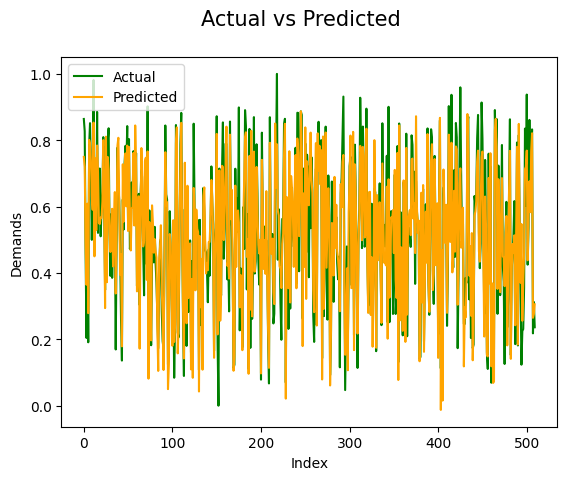

In [82]:

c = [i for i in range(0, len(X_train), 1)]

plt.plot(c, y_train, color="green", label='Actual')  
plt.plot(c, y_train_pred, color="orange", label='Predicted')  

plt.suptitle('Actual vs Predicted', fontsize=15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend()  
plt.show()


#### Actual and Predicted result following almost the same pattern so this model seems ok

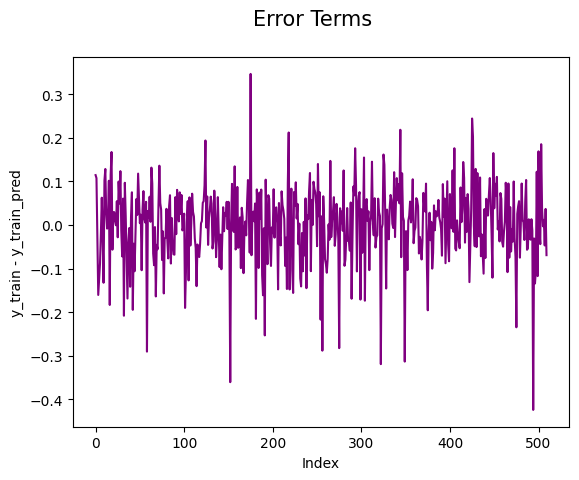

In [83]:
c = [i for i in range(0, len(X_train), 1)]

plt.plot(c, y_train - y_train_pred, color="purple")

plt.suptitle('Error Terms', fontsize=15)
plt.xlabel('Index')
plt.ylabel('y_train - y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

#### _`Print R-squared Value`_

In [84]:

r2_score(y_train,y_train_pred)

0.8454897554491547

### _`Inference`_
R2 Same as we obtained for our final model

#### <font color =slateblue>Linearity Check

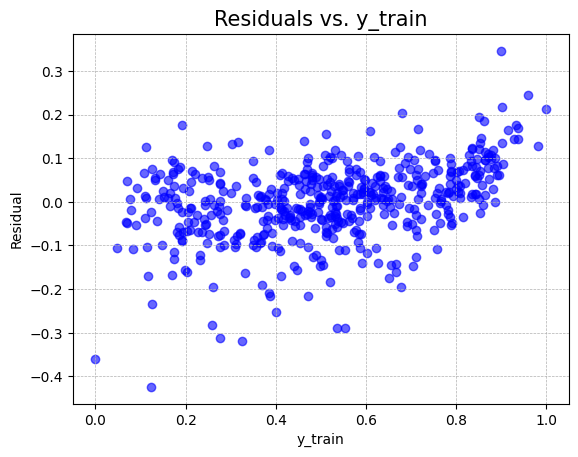

In [85]:
import matplotlib.pyplot as plt

residual = y_train - y_train_pred

plt.scatter(y_train, residual, color="blue", alpha=0.6)

plt.ylabel("Residual")
plt.xlabel("y_train")
plt.title("Residuals vs. y_train", fontsize=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


#### <font color =slateblue>Predict values for test data set

In [86]:
#Scale variables in df_test
scal_var =['temp','atemp','hum','windspeed','days_old','cnt']

#Test data to be transformed only, no fitting
df_test[scal_var] = scaler.transform(df_test[scal_var])
df_test.head()

temp     atemp       hum  windspeed       cnt  days_old  \
184  0.831783  0.769660  0.657364   0.084219  0.692706  0.252747   
535  0.901354  0.842587  0.610133   0.153728  0.712034  0.734890   
299  0.511964  0.496145  0.837699   0.334206  0.303382  0.410714   
221  0.881625  0.795343  0.437098   0.339570  0.547400  0.303571   
152  0.817246  0.741471  0.314298   0.537414  0.569029  0.208791   

     season_spring  season_summer  season_winter  yr_1  ...  holiday_1  \
184              0              0              0     0  ...          1   
535              0              1              0     1  ...          0   
299              0              0              1     0  ...          0   
221              0              0              0     0  ...          0   
152              0              1              0     0  ...          0   

     weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
184            0            0            0            0            0   
535            0            0            0            1            0   
299            0            1            0            0            0   
221            0            0            0            0            0   
152            0            1            0            0            0   

     weekday_wed  workingday_1  weathersit_good  weathersit_moderate  
184            1             0                0                    1  
535            0             1                1                    0  
299            0             0                0                    1  
221            0             1                1                    0  
152            0             0                1                    0  

[5 rows x 31 columns]

In [87]:
df_train.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'days_old', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sept', 'holiday_1', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'workingday_1', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [88]:
print(df_test.columns)


Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sept', 'holiday_1', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'workingday_1', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')


### <font color =red>Dividing into X and Y set for model prediction

In [89]:
y_test = df_test.pop('cnt')
X_test = df_test

In [90]:
# Adding a constant variable 
X_test = sm.add_constant(X_test[X_train_rfe.columns])

In [91]:
X_test.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'holiday_1', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [92]:
# Making predict
y_pred = lm.predict(X_test)

In [93]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

### <font color=slateblue> Plot error terms for test data


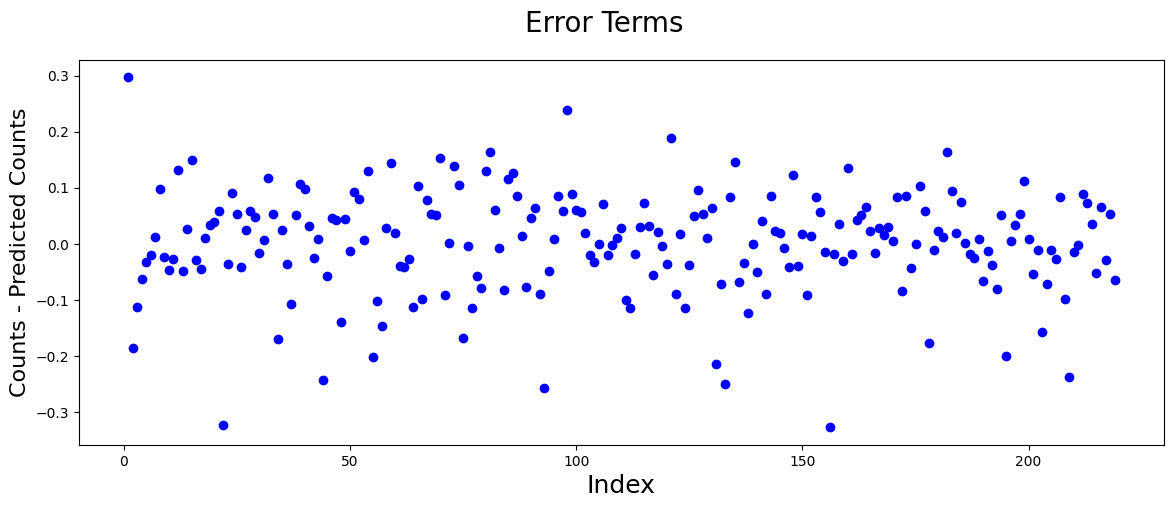

In [94]:
plot_err_terms(y_test,y_pred)

#### _`Inference`_
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

#### <font color =slateblue>Homoscedacity

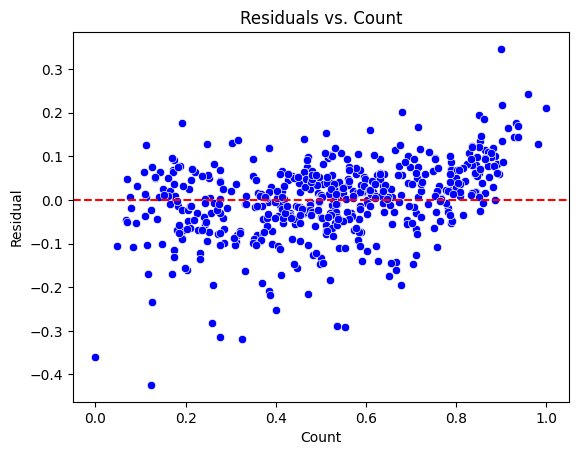

In [95]:
residual = y_train - y_train_pred

# Use keyword arguments for sns.scatterplot
sns.scatterplot(x=y_train, y=residual, color="blue")

# Plotting the zero residual line
plt.axhline(0, color='red', linestyle='--')

plt.xlabel('Count')
plt.ylabel('Residual')
plt.title('Residuals vs. Count')
plt.show()

##### _`Inference`_ 
R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_pred')

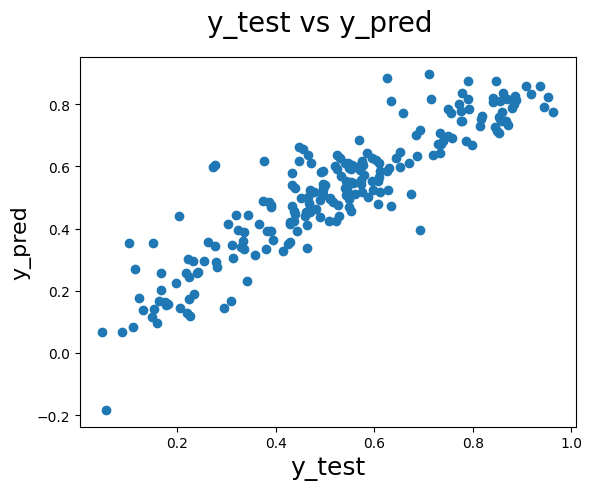

In [96]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

####  _`Inference`_
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

In [97]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

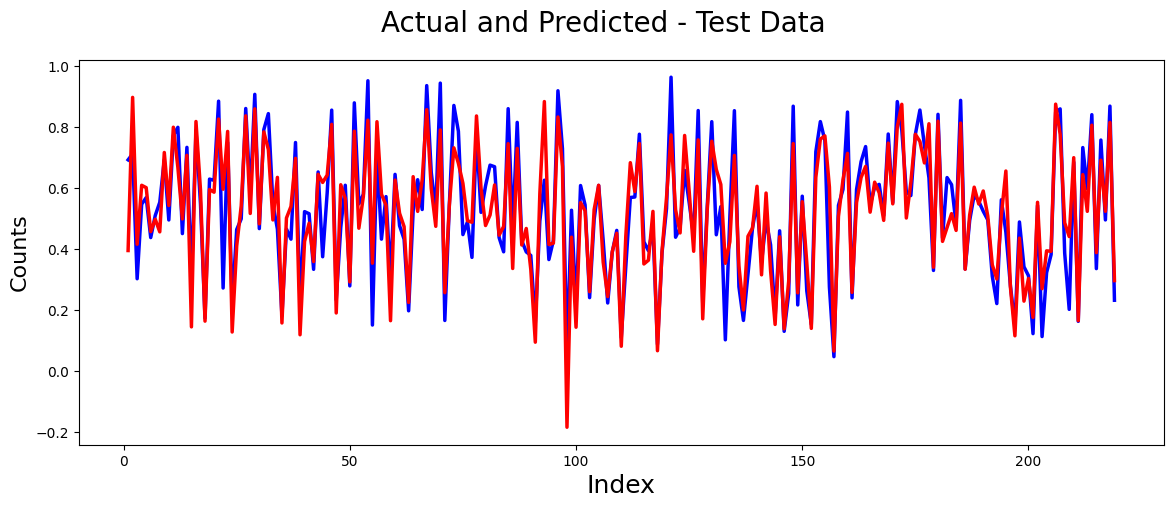

In [98]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_pred,len(y_test)+1,'Test Data')

#### _`Inference`_
As we can see predictions for test data is very close to actuals

## <font color =red>R-Squared value for test predictions

In [99]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_pred)

0.8216461699732152

In [100]:
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_pred))

r2_score of train dataset 0.8454897554491547
r2_score of test dataset 0.8216461699732152


#### <font color = 'Blue'> Insights: </font>
- r2_score for train set is 0.84 and test set r2_score is 0.813 which is quite close to each other means training set is able to apply learning over the test set.

In [101]:
r2 = round(r2_score(y_test, y_pred), 4)

print("R^2 score:", r2)

R^2 score: 0.8216


<h2> 
    <font color = black>
        <span style='font-family:Candra'>
    Hypothesis Testing 
                 </font>
</h2>



<p> Hypothesis Testing States that<br>
    <blockquote>
        H0:B1=B2=...=Bn=0 <br>
        H1: at least one  Bi!=0
    </blockquote><br>

In [102]:
round(lm.params,4)

const                  0.0721
temp                   0.4800
hum                   -0.1602
windspeed             -0.1885
season_spring         -0.0617
season_summer          0.0408
season_winter          0.1034
yr_1                   0.2303
mnth_dec              -0.0372
mnth_jan              -0.0437
mnth_jul              -0.0555
mnth_nov              -0.0409
mnth_sept              0.0749
holiday_1             -0.0912
weathersit_good        0.2481
weathersit_moderate    0.1922
dtype: float64

From the *lm* model summary, it is evident that all our coefficients are not equal to zero, which means we can **REJECT the NULL HYPOTHESIS**

In [103]:
# Calculating RMSE for the selected Model 
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.092

In [104]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0687


<h2>   
<span>
    <font color = Black >
          Adjusted R<sup>2</sup> Value Calculation for bike_test dataframe           
        </font>    
</h2>
<br>

</span>
<span style="font-size:18" >
    <span style>
        <font color = black > 
      <math> R<sup>2</sup><sub>adj</sub>=1−</math>
        <span style="display: inline-block;vertical-align: middle;">
    <div style="text-align: center;border-bottom: 1px solid black;">(1-R<sup>2</sup>) x (n-1)</div>
     <div style="text-align: center;">(n-p-1)</div> 
        </span>
        </font>
</span>
</span>

<span style='font-family:Candra'>
<h3>  <span style='font-family:Candra'> 
      <font color = black >
            Model Train & Test R2 Statsitics Comparison           
        </font>    
</h3>
<table>
    <thead>
    <tr><th>Measurement</th><th>Train Dataset</th><th>Test Dataset</th></tr>
    </thead>
    <tbody>
        <tr><td>R2 Value</td><td>84.0%</td><td>83.6%</td></tr>
        <tr><td>Adjusted R2 Value</td><td>84.5%</td><td>82.4%</td></tr>
    </tbody>
</table>
    <p> The model seems to be good enough for generalized datasets </p>
</span>

<span style="color: green; font-weight: bold; font-size: 20px;">
Equation of the Best Fitted Line:
</span>
<br>


<span style="font-size: 14px;">
cnt = <b>0.2466</b> + <b>0.4377</b> × temp - <b>0.1586</b> × windspeed - <b>0.0716</b> × season_spring + <b>0.0333</b> × season_summer + <b>0.0887</b> × season_winter + <b>0.2343</b> × yr_2019 - <b>0.0445</b> × mnth_Dec - <b>0.0503</b> × mnth_Jan - <b>0.0504</b> × mnth_July - <b>0.0419</b> × mnth_Nov + <b>0.0682</b> × mnth_sep - <b>0.0919</b> × holiday_Yes - <b>0.2929</b> × weathersit_Light Snow - <b>0.0814</b> × weathersit_Mist
</span>



<span style="color: darkslateblue; font-weight: bold; font-size: 24px;">
Comprehensive Analysis and Recommendations
</span>

<span style="color: darkslateblue; font-weight: bold; font-size: 20px;">
Key Insights
</span>

Based on our model analysis, here are the crucial insights for the company:

- **Temperature (Temp)**: Customers clearly prefer booking bikes when the temperature is warm and pleasant. Ensuring bike availability during these times can drive higher bookings.
- **Year**: There was a significant increase in bike bookings in 2019 compared to 2018. With the post-COVID scenario, people are expected to prefer bike sharing over crowded public transportation, potentially increasing demand.
- **Season**: The analysis indicates that customers prefer the Summer and Fall seasons for bike bookings. Higher bike availability during these peak times will meet increased demand.
- **Weather**: Customers tend to avoid renting bikes during light snow and rain, showing a preference for clear and cloudy weather. Adjusting bike availability based on weather conditions can optimize bookings.

<span style="color: darkslateblue; font-weight: bold; font-size: 24px;">
Recommendations to Increase Sales
</span>

Implement the following strategies to boost sales:

- **Frequent Sanitization of Bikes**: Regularly sanitize bikes and highlight this in the booking app to build customer trust and encourage more frequent bookings.
- **Providing Discounts and Better Deals**: Offer attractive discounts and deals during rainy seasons to make bike rentals more appealing despite the weather.
- **Rain Covers or Umbrellas**: Equip bikes with rain covers or umbrellas to attract more customers during rainy periods by providing added convenience.

<span style="color: red; font-weight: bold; font-size: 20px;">
Conclusion
</span>

- **Positive Influences**: Bike-sharing demand increases with higher temperatures, during Summer and Fall seasons, in 2019, and in September.
- **Negative Influences**: Demand decreases with higher windspeed, during the Spring season, on holidays, and during Light Snow or misty weather.
- **Weather Effects**: Normal temperatures tend to increase demand, while extreme weather conditions like Light Snow and mist reduce it.
- **Wind and Holidays**: High wind conditions discourage biking, and bike count drops during holidays.

<span style="color: darkslateblue; font-weight: bold; font-size: 20px;">
Key Variables for Predicting Bike Demand
</span>

To effectively predict bike demand, focus on these significant variables:

- Holiday Status
- Temperature
- Humidity
- Windspeed
- Season
- Months: January, July, September, November, December
- Year: 2019
- Day of the Week: Sunday
- Weather Conditions: Light Snow, Mist + Cloudy
